# THE SUPERMARKET STORE ANALYSIS

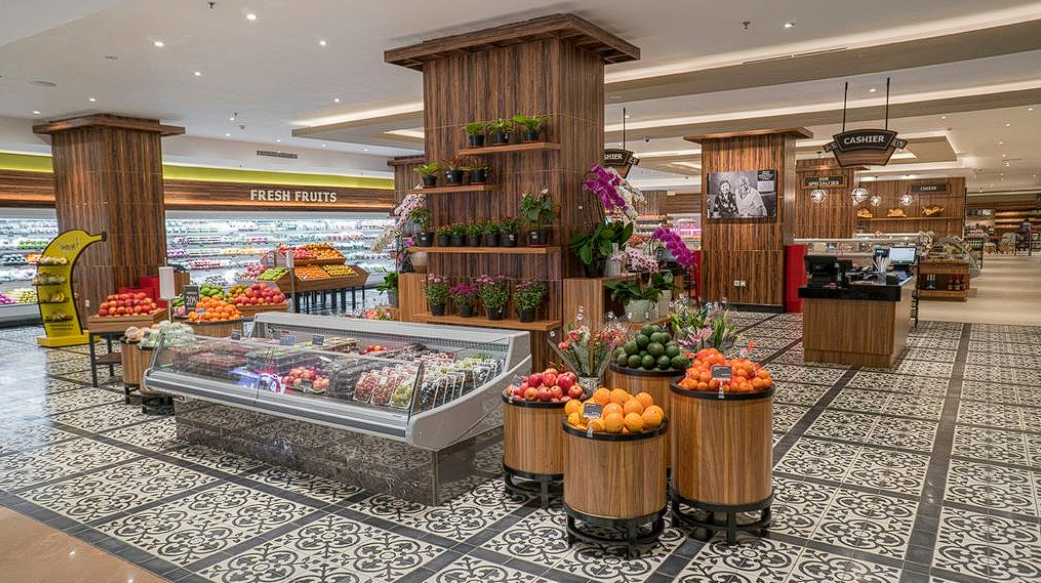

**BACKGROUND**

A supermarket that sells perishable goods **(fruits, meat, fish)** and non-perishable goods **(gold, wine, sweet products)** is aiming to improve its sales performance. The supermarket industry is highly competitive, requiring the company’s marketing team to implement the right strategies to encourage repeat purchases and enhance customer engagement.

The company is facing challenges in retaining customers and increasing purchase frequency, with an **average customer recency** of **49 days**, which is suboptimal for a supermarket. Additionally, the company's **campaign response rates** are quite low. In one of the previous campaigns, the response rate reached as low as 1%, with the highest recorded rate being **14%**.

Given these performance gaps, the marketing team needs to improve their campaigns by tailoring them to the characteristics of various customer segments. This will help increase purchase frequency and improve customer retention. Therefore, the data team will conduct customer segmentation using the RFM method.

**PROBLEM STATEMENT**

“How can the company improve their **customer retention** and **purchase frequency** through targeted marketing **campaigns**, leveraging insights from customer segmentation??”

**GOALS**

There are three main goals that the analysis will try to solve based on the problem statement,
- To understand **variables** that influence purchase frequency and customer retention.
- Identify the company's **customers segments** based on their purchasing behavior using Recency, Frequency, and Monetary (RFM) analysis.
- Develop marketing strategy **recommendations** tailored to each customer segment.

By understanding the unique characteristics of each customer segment and the supermarket customers in general, the supermarket can improve customer engagement, optimize marketing efforts, and ultimately drive revenue growth.

# IMPORT LIBRARY AND DATASET

In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format # add thousand separator for float

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single 58,138.00        0   
1      2174        1954  Graduation         Single 46,344.00        1   
2      4141        1965  Graduation       Together 71,613.00        0   
3      6182        1984  Graduation       Together 26,646.00        1   
4      5324        1981         PhD        Married 58,293.00        1   
...     ...         ...         ...            ...       ...      ...   
2235  10870        1967  Graduation        Married 61,223.00        0   
2236   4001        1946         PhD       Together 64,014.00        2   
2237   7270        1981  Graduation       Divorced 56,981.00        0   
2238   8235        1956      Master       Together 69,245.00        0   
2239   9405        1954         PhD        Married 52,869.00        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- There are missing value di kolom `Income`.
- Change data type `ID` into object/string.
- `Dt_Customer` into datetime.
- Remove `Z_CostContact` and `Z_Revenue` columns.

There are 26 columns in the dataset, as follows,

**People & Demography Data**:
- `ID`: Customer ID.
- `Year_Birth`: Year of birth of the customer.
- `Education`: Customer's educational background.
- `Marital_Status`: Customer's marital status.
- `Income`: Customer's annual income/salary.
- `Kidhome`: Number of children in the customer's household.
- `Teenhome`: Number of teenagers in the customer's household.
- `Dt_Customer`: Date the customer registered with the company.
- `Recency`: Number of days since the customer last made a purchase.
- `Complain`: 1 if the customer filed a complaint in the last 2 years, 0 if not.

**Products Data**
- `MntWines`: Total purchases of wine products in the last 2 years.
- `MntFruits`: Total purchases of fruit products in the last 2 years.
- `MntMeatProducts`: Total purchases of meat products in the last 2 years.
- `MntFishProducts`: Total purchases of fish products in the last 2 years.
- `MntSweetProducts`: Total purchases of sweet products in the last 2 years.
- `MntGoldProducts`: Total purchases of gold products in the last 2 years.

**Place or Channel Data**
- `NumDealsPurchases`: Number of purchases made with a discount.
- `NumWebPurchases`: Number of purchases made through the company's website.
- `NumCatalogPurchases`: Number of purchases made using a catalog.
- `NumStorePurchases`: Number of purchases made directly in the store.
- `NumWebVisitsMonth`: Number of website visits in the last month.

**Promotions and Campaign Data**
- `AcceptedCmp1`: 1 if the customer accepted the first campaign offer, 0 if not.
- `AcceptedCmp2`: 1 if the customer accepted the second campaign offer, 0 if not.
- `AcceptedCmp3`: 1 if the customer accepted the third campaign offer, 0 if not.
- `AcceptedCmp4`: 1 if the customer accepted the fourth campaign offer, 0 if not.
- `AcceptedCmp5`: 1 if the customer accepted the fifth campaign offer, 0 if not.
- `Response`: 1 if the customer accepted the last campaign offer, 0 if not.

# DATA UNDERSTANDING AND CLEANING

In this section, the dataset will be summarized to check the data distribution based on the available feature/columns and the data will be cleaned. The data cleaning processes include of handling missing values, duplicated datas, anomalies and outliers handling, as well as the justification of those steps.

In [11]:
print(f'No. of rows and columns in this dataset: {df.shape}')

No. of rows and columns in this dataset: (2240, 29)


In [12]:
df_clean = df.copy()

Change the `ID` data type into object/string, and `Dt_Customer` into timeseries

In [14]:
#id to string & registration_import_time to timeseries
df_clean['ID'] = df_clean['ID'].astype('str')
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Check the data overall summary using .describe() mainly for identify outliers, and check the data unique values

In [17]:
display(df_clean.describe(), df_clean.describe(include='object'))

Year_Birth     Income  Kidhome  Teenhome  \
count    2,240.00   2,216.00 2,240.00  2,240.00   
mean     1,968.81  52,247.25     0.44      0.51   
min      1,893.00   1,730.00     0.00      0.00   
25%      1,959.00  35,303.00     0.00      0.00   
50%      1,970.00  51,381.50     0.00      0.00   
75%      1,977.00  68,522.00     1.00      1.00   
max      1,996.00 666,666.00     2.00      2.00   
std         11.98  25,173.08     0.54      0.54   

                         Dt_Customer  Recency  MntWines  MntFruits  \
count                           2240 2,240.00  2,240.00   2,240.00   
mean   2013-07-10 10:01:42.857142784    49.11    303.94      26.30   
min              2012-07-30 00:00:00     0.00      0.00       0.00   
25%              2013-01-16 00:00:00    24.00     23.75       1.00   
50%              2013-07-08 12:00:00    49.00    173.50       8.00   
75%              2013-12-30 06:00:00    74.00    504.25      33.00   
max              2014-06-29 00:00:00    99.00  1,493.00     199.00   
std                              NaN    28.96    336.60      39.77   

       MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
count         2,240.00         2,240.00  ...           2,240.00      2,240.00   
mean            166.95            37.53  ...               5.32          0.07   
min               0.00             0.00  ...               0.00          0.00   
25%              16.00             3.00  ...               3.00          0.00   
50%              67.00            12.00  ...               6.00          0.00   
75%             232.00            50.00  ...               7.00          0.00   
max           1,725.00           259.00  ...              20.00          1.00   
std             225.72            54.63  ...               2.43          0.26   

       AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
count      2,240.00      2,240.00      2,240.00      2,240.00  2,240.00   
mean           0.07          0.07          0.06          0.01      0.01   
min            0.00          0.00          0.00          0.00      0.00   
25%            0.00          0.00          0.00          0.00      0.00   
50%            0.00          0.00          0.00          0.00      0.00   
75%            0.00          0.00          0.00          0.00      0.00   
max            1.00          1.00          1.00          1.00      1.00   
std            0.26          0.26          0.25          0.11      0.10   

       Z_CostContact  Z_Revenue  Response  
count       2,240.00   2,240.00  2,240.00  
mean            3.00      11.00      0.15  
min             3.00      11.00      0.00  
25%             3.00      11.00      0.00  
50%             3.00      11.00      0.00  
75%             3.00      11.00      0.00  
max             3.00      11.00      1.00  
std             0.00       0.00      0.36  

[8 rows x 26 columns]

ID   Education Marital_Status
count   2240        2240           2240
unique  2240           5              8
top     5524  Graduation        Married
freq       1        1127            864

In [18]:
pd.set_option('display.max_colwidth', 1000)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

Column Name  Number of Unique  \
0                    ID              2240   
1            Year_Birth                59   
2             Education                 5   
3        Marital_Status                 8   
4                Income              1974   
5               Kidhome                 3   
6              Teenhome                 3   
7           Dt_Customer               663   
8               Recency               100   
9              MntWines               776   
10            MntFruits               158   
11      MntMeatProducts               558   
12      MntFishProducts               182   
13     MntSweetProducts               177   
14         MntGoldProds               213   
15    NumDealsPurchases                15   
16      NumWebPurchases                15   
17  NumCatalogPurchases                14   
18    NumStorePurchases                14   
19    NumWebVisitsMonth                16   
20         AcceptedCmp3                 2   
21         AcceptedCmp4                 2   
22         AcceptedCmp5                 2   
23         AcceptedCmp1                 2   
24         AcceptedCmp2                 2   
25             Complain                 2   
26        Z_CostContact                 1   
27            Z_Revenue                 1   
28             Response                 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                            [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In general, there are several columns that need to be handled,
- In`Marital_Status` column, 'YOLO' and 'Absurd' need to be handled. Besides that, data in this columns can be merged/modified into 2 distinct values, namely 'Alone' and 'Partner'.
- Data in `Kidhome` and `Teenhome` columns can be merged into one column `Children`
- Data in`Education` columns can be grouped into three: 'Undergraduate', 'Graduate', and 'Post-Graduate'
- Drop `Z_CostContact` and `Z_Revenue` columns
- There are anomalies in `Year_Birth` columns, 1893 and 1900, that needs to be dropped.
- Newest user are registrated at 2014-06-29. Combined this with recency columns to get reference date (today's date in analysis)
- There are outliers at 'Mnt' columns that need to be handled.
- From `Year_Birth` columns, new columns can be made, `Age` and `Generations`, which represents the customer's age and what generations that they belong to.
- There are missing values in `Income` that needs to be investigated.

First, drop `Z_CostContact` and `Z_Revenue` columns. After that, check duplicated date, mainly in `ID` column.

In [21]:
#Drop Z columns
df_clean.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

#Check duplicate
df_clean.duplicated().sum()

0

There are no duplicated data. Before handling the missing values in `Income`, demography columns will be engineered as mentioned earlier.

In [23]:
#Marital_Status into 'Alone' dan 'Partner'
df_clean["Marital_Status"] = df_clean["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

#Education to 3 group
df_clean["Education"]=df_clean["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Graduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Kidhome dan Teenhome into Children
df_clean['Children']=df_clean['Kidhome']+df_clean['Teenhome']
df_clean.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
df_clean

ID  Year_Birth     Education Marital_Status    Income Dt_Customer  \
0      5524        1957      Graduate          Alone 58,138.00  2012-09-04   
1      2174        1954      Graduate          Alone 46,344.00  2014-03-08   
2      4141        1965      Graduate        Partner 71,613.00  2013-08-21   
3      6182        1984      Graduate        Partner 26,646.00  2014-02-10   
4      5324        1981  Postgraduate        Partner 58,293.00  2014-01-19   
...     ...         ...           ...            ...       ...         ...   
2235  10870        1967      Graduate        Partner 61,223.00  2013-06-13   
2236   4001        1946  Postgraduate        Partner 64,014.00  2014-06-10   
2237   7270        1981      Graduate          Alone 56,981.00  2014-01-25   
2238   8235        1956  Postgraduate        Partner 69,245.00  2014-01-24   
2239   9405        1954  Postgraduate        Partner 52,869.00  2012-10-15   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0          58       635         88              546  ...                  4   
1          38        11          1                6  ...                  2   
2          26       426         49              127  ...                 10   
3          26        11          4               20  ...                  4   
4          94       173         43              118  ...                  6   
...       ...       ...        ...              ...  ...                ...   
2235       46       709         43              182  ...                  4   
2236       56       406          0               30  ...                  5   
2237       91       908         48              217  ...                 13   
2238        8       428         30              214  ...                 10   
2239       40        84          3               61  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  
0                0             0         0         1         0  
1                0             0         0         0         2  
2                0             0         0         0         0  
3                0             0         0         0         1  
4                0             0         0         0         1  
...            ...           ...       ...       ...       ...  
2235             0             0         0         0         1  
2236             1             0         0         0         3  
2237             0             0         0         0         0  
2238             0             0         0         0         1  
2239             0             0         0         1         2  

[2240 rows x 26 columns]

Next, handling missing values in `Income` columns.

In [25]:
pd.DataFrame(round(100*df_clean.isnull().sum()/len(df),2)).rename(columns={0:"Missing_Percentage"})

Missing_Percentage
ID                                 0.00
Year_Birth                         0.00
Education                          0.00
Marital_Status                     0.00
Income                             1.07
Dt_Customer                        0.00
Recency                            0.00
MntWines                           0.00
MntFruits                          0.00
MntMeatProducts                    0.00
MntFishProducts                    0.00
MntSweetProducts                   0.00
MntGoldProds                       0.00
NumDealsPurchases                  0.00
NumWebPurchases                    0.00
NumCatalogPurchases                0.00
NumStorePurchases                  0.00
NumWebVisitsMonth                  0.00
AcceptedCmp3                       0.00
AcceptedCmp4                       0.00
AcceptedCmp5                       0.00
AcceptedCmp1                       0.00
AcceptedCmp2                       0.00
Complain                           0.00
Response                           0.00
Children                           0.00

`Income` columns has only 1.07% missing values from the data, Since the percentage are below 5%, the missing values row can be remove. However, further checking are needed, especially if those values represent `Income` = 0.

In [27]:
df_clean[df_clean['Income']==0]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Children]
Index: []

[0 rows x 26 columns]

Since there was no `Income` = 0 in the data so far, there is a possibilty that those missing values are the customer with no income. Further checking are needed to decided the proper method to handle these missing values.

In [29]:
df_clean[df_clean['Income'].isna()]

ID  Year_Birth     Education Marital_Status  Income Dt_Customer  \
10     1994        1983      Graduate        Partner     NaN  2013-11-15   
27     5255        1986      Graduate          Alone     NaN  2013-02-20   
43     7281        1959  Postgraduate          Alone     NaN  2013-11-05   
48     7244        1951      Graduate          Alone     NaN  2014-01-01   
58     8557        1982      Graduate          Alone     NaN  2013-06-17   
71    10629        1973      Graduate        Partner     NaN  2012-09-14   
90     8996        1957  Postgraduate        Partner     NaN  2012-11-19   
91     9235        1957      Graduate          Alone     NaN  2014-05-27   
92     5798        1973  Postgraduate        Partner     NaN  2013-11-23   
128    8268        1961  Postgraduate        Partner     NaN  2013-07-11   
133    1295        1963      Graduate        Partner     NaN  2013-08-11   
312    2437        1989      Graduate        Partner     NaN  2013-06-03   
319    2863        1970      Graduate          Alone     NaN  2013-08-23   
1379  10475        1970  Postgraduate        Partner     NaN  2013-04-01   
1382   2902        1958      Graduate        Partner     NaN  2012-09-03   
1383   4345        1964      Graduate          Alone     NaN  2014-01-12   
1386   3769        1972  Postgraduate        Partner     NaN  2014-03-02   
2059   7187        1969  Postgraduate        Partner     NaN  2013-05-18   
2061   1612        1981  Postgraduate          Alone     NaN  2013-05-31   
2078   5079        1971      Graduate        Partner     NaN  2013-03-03   
2079  10339        1954  Postgraduate        Partner     NaN  2013-06-23   
2081   3117        1955      Graduate          Alone     NaN  2013-10-18   
2084   5250        1943  Postgraduate          Alone     NaN  2013-10-30   
2228   8720        1978      Graduate        Partner     NaN  2012-08-12   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
10         11         5          5                6  ...                  2   
27         19         5          1                3  ...                  0   
43         80        81         11               50  ...                  4   
48         96        48          5               48  ...                  4   
58         57        11          3               22  ...                  3   
71         25        25          3               43  ...                  3   
90          4       230         42              192  ...                  8   
91         45         7          0                8  ...                  2   
92         87       445         37              359  ...                  8   
128        23       352          0               27  ...                  7   
133        96       231         65              196  ...                  7   
312        69       861        138              461  ...                 12   
319        67       738         20              172  ...                 10   
1379       39       187          5               65  ...                  6   
1382       87        19          4               12  ...                  3   
1383       49         5          1                9  ...                  2   
1386       17        25          1               13  ...                  3   
2059       52       375         42               48  ...                  4   
2061       82        23          0               15  ...                  3   
2078       82        71          1               16  ...                  3   
2079       83       161          0               22  ...                  4   
2081       95       264          0               21  ...                  5   
2084       75       532        126              490  ...                 11   
2228       53        32          2             1607  ...                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
10                    7             0             0            

There are no specific pattern shown based on demography columns. The total amount of purchases columns 'Mnt' also show that there are no specific pattern to justify that these values belongs to customer with no income. Hence, these missing values will be imputed using median or mean value, based on education level of the customers. Decision between median or mean are based on the normality of the data distribution.

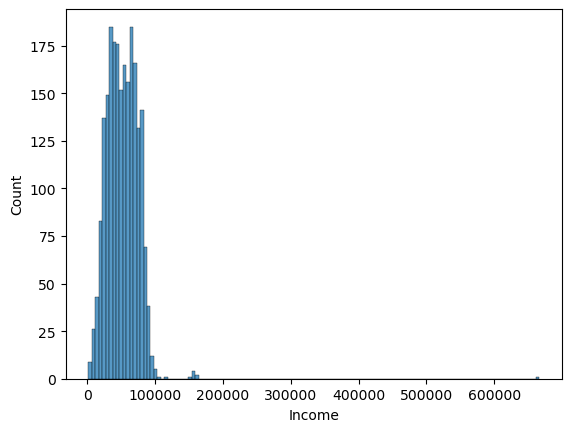

In [31]:
sns.histplot(data=df_clean, x='Income')
plt.show()

The histogram of income shown that the data are not normally distributed. Hence, the missing values are imputed using median, based on customer education.

In [33]:
# Imputer
imputer = SimpleImputer(strategy='median')

# Impute per education
df_clean['Income'] = df_clean.groupby('Education')['Income'].transform(
    lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel()
)

df_clean[df_clean['Income'].isna()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Children]
Index: []

[0 rows x 26 columns]

The next step of data cleaning processes are outliers & anomalies handling. These are checked using box plot and histogram visualization. First, check `Year_Birth` columns, where anomalies are already detected as mentioned earlier.

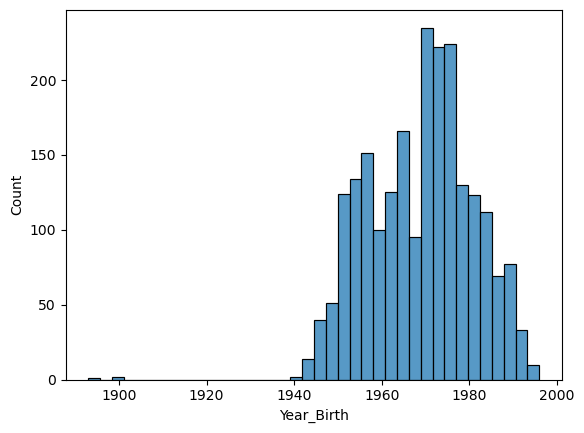

In [35]:
sns.histplot(data=df_clean, x='Year_Birth')
plt.show()

There are anomalies, in year 1900-ish. It should not be possible for customer with that age to do transactions in the supermarket. Remove these anomalies,

In [37]:
#check anomalies
df_clean[df_clean['Year_Birth']<1920]

ID  Year_Birth     Education Marital_Status    Income Dt_Customer  \
192   7829        1900      Graduate          Alone 36,640.00  2013-09-26   
239  11004        1893      Graduate          Alone 60,182.00  2014-05-17   
339   1150        1899  Postgraduate        Partner 83,532.00  2013-09-26   

     Recency  MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
192       99        15          6                8  ...                  2   
239       23         8          0                5  ...                  2   
339       36       755        144              562  ...                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  
192             0             0         1         0         1  
239             0             0         0         0         1  
339             0             0         0         0         0  

[3 rows x 26 columns]

In [38]:
#remove anomalies
df_clean=df_clean[df_clean['Year_Birth']>1920]

After that, check outlier on numerical columns : recency, 'mnt' and income columns.

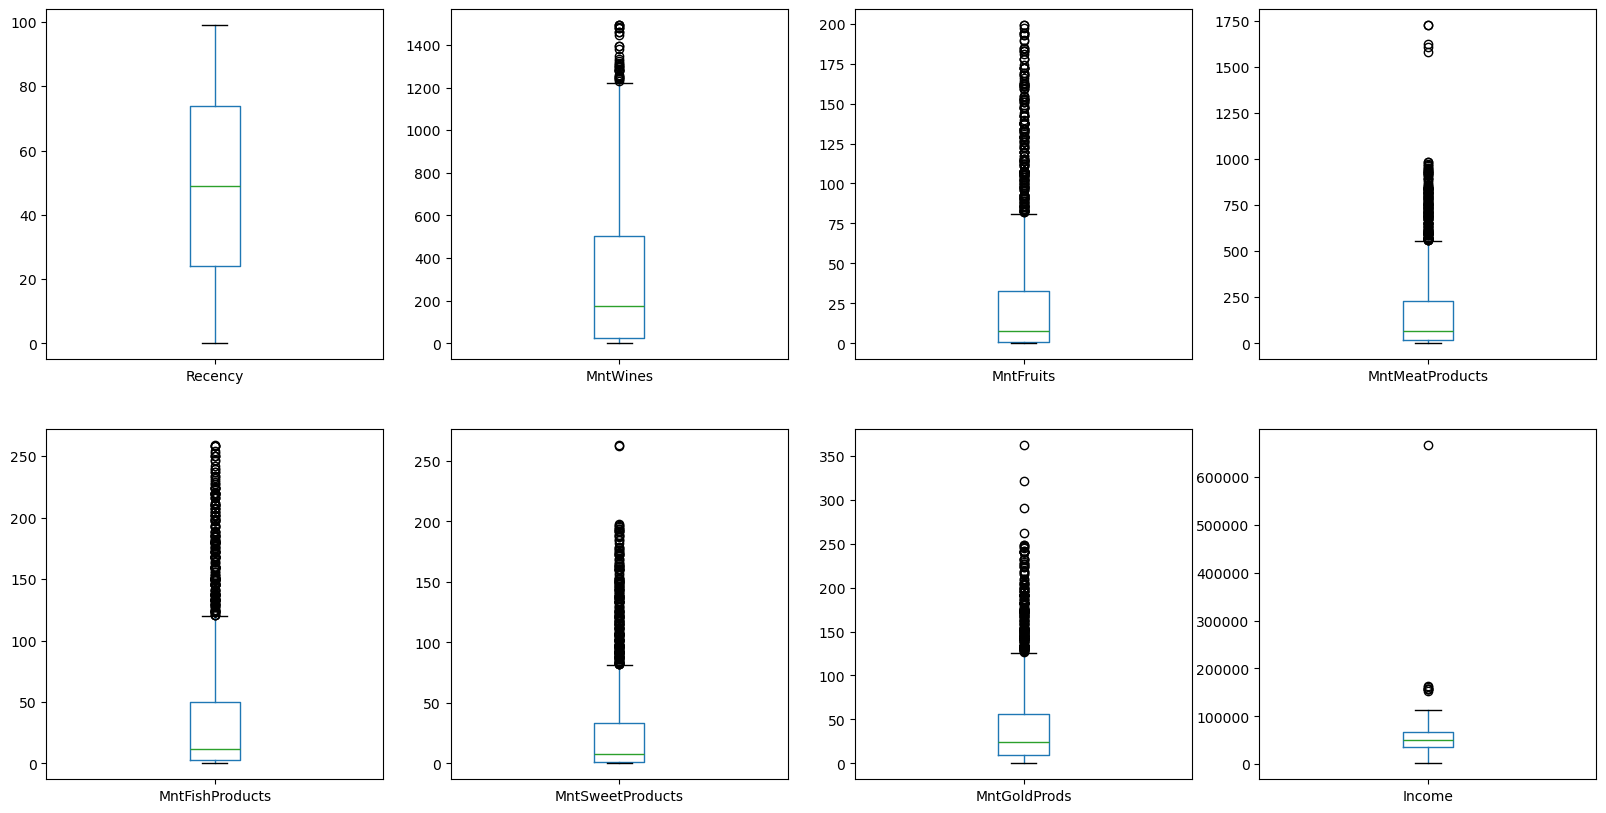

In [40]:
numerical_column = ['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Income']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_clean.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

There are indications of extreme outlier in `Income`. This outlier will be removed, as in general, outlier in demography does not represent the characteristic of the customer. Outliers in numerical columns will be checked/ignored as these outlier are more common/natural to happen in monetary value and transactions frequency.

In [42]:
df_clean[df_clean['Income']>600000]

ID  Year_Birth Education Marital_Status     Income Dt_Customer  \
2233  9432        1977  Graduate        Partner 666,666.00  2013-06-02   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
2233       23         9         14               18  ...                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  
2233             0             0         0         0         1  

[1 rows x 26 columns]

In [43]:
#remove extreme outlier income
df_clean = df_clean[df_clean['Income']<600000]

Next, check outlier in other numerical columns,

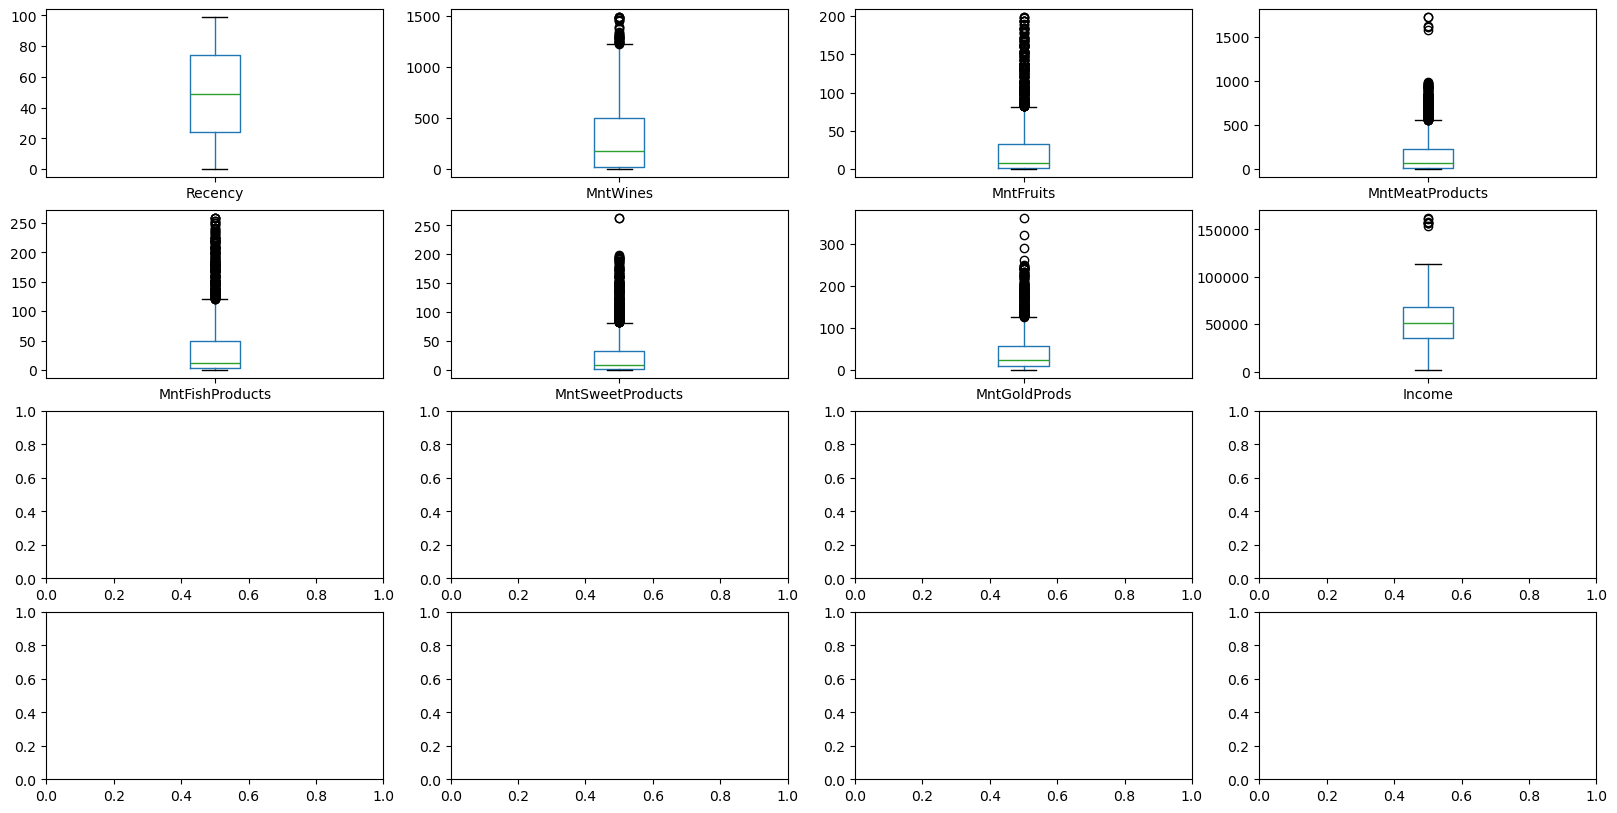

In [45]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_clean.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Based on the visualizations, there are no outlier in campaigns columns. There are outliers in the other 5 colummns, but those outliers are deemed natural.

After the outlier handling, i create several columns for the analysis processes. First, create `Age` based on difference between `Year_Birth` and Reference Date. Reference Date are defined based on customer registration date `Dt_Customer` and `Recency`. Reference date are not defined as day+1 from newest registration date, because customer that registrated in that date, also have `Recency` value, which is not equal 0.

In [48]:
df_clean[df_clean['Dt_Customer']==df_clean['Dt_Customer'].max()]

ID  Year_Birth     Education Marital_Status    Income Dt_Customer  \
200  7300        1952      Graduate          Alone 69,142.00  2014-06-29   
989   453        1956  Postgraduate          Alone 35,340.00  2014-06-29   

     Recency  MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
200       50       448          4               34  ...                  7   
989        1        27          0               12  ...                  3   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
200                  5             0             1             0   
989                  5             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  
200             0             0         0         0         1  
989             0             0         0         0         2  

[2 rows x 26 columns]

Create new columns `Last_Purchase_Date`, as sum of `Dt_Customer` and `Recency`. The maximum value of this columns, plus one, respresents the reference date of the analysis.

In [50]:
# Add Recency (in days) to Dt_Customer
df_clean['Last_Purchase_Date'] = df_clean['Dt_Customer'] + pd.to_timedelta(df_clean['Recency'], unit='D')

# Display the updated DataFrame
print(df_clean[['ID', 'Dt_Customer', 'Recency', 'Last_Purchase_Date']])

         ID Dt_Customer  Recency Last_Purchase_Date
0      5524  2012-09-04       58         2012-11-01
1      2174  2014-03-08       38         2014-04-15
2      4141  2013-08-21       26         2013-09-16
3      6182  2014-02-10       26         2014-03-08
4      5324  2014-01-19       94         2014-04-23
...     ...         ...      ...                ...
2235  10870  2013-06-13       46         2013-07-29
2236   4001  2014-06-10       56         2014-08-05
2237   7270  2014-01-25       91         2014-04-26
2238   8235  2014-01-24        8         2014-02-01
2239   9405  2012-10-15       40         2012-11-24

[2236 rows x 4 columns]


In [51]:
df_clean['Last_Purchase_Date'].max()

Timestamp('2014-10-04 00:00:00')

Hence, the reference date of the analysis is 2014-10-05. Create the age columns,

In [53]:
#drop last_purchase_date
df_clean.drop(columns = 'Last_Purchase_Date', inplace=True)

#Define Age
df_clean['Age'] = 2014 - df_clean['Year_Birth']
df_clean.head()

ID  Year_Birth     Education Marital_Status    Income Dt_Customer  \
0  5524        1957      Graduate          Alone 58,138.00  2012-09-04   
1  2174        1954      Graduate          Alone 46,344.00  2014-03-08   
2  4141        1965      Graduate        Partner 71,613.00  2013-08-21   
3  6182        1984      Graduate        Partner 26,646.00  2014-02-10   
4  5324        1981  Postgraduate        Partner 58,293.00  2014-01-19   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0       58       635         88              546  ...                  7   
1       38        11          1                6  ...                  5   
2       26       426         49              127  ...                  4   
3       26        11          4               20  ...                  6   
4       94       173         43              118  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Children  Age  
0         0         1         0   57  
1         0         0         2   60  
2         0         0         0   49  
3         0         0         1   30  
4         0         0         1   33  

[5 rows x 27 columns]

Define `Generations` based on the customer's `Year_Birth`. Customer's can be grouped into certain generations as,
- Baby Boomers : 1946-1964 and <1946
- Generations X (Gen X) : 1965-1980
- Millenials : 1981-1996

As mentioned earlier, the max value of `Year_Birth` is 1996. Any customers born before 1946 are classified as Baby Boomers for analytical purposes.

In [55]:
df_clean['Generations'] = pd.cut(df_clean['Year_Birth'], bins=[1939, 1964, 1980, float('inf')], labels=['Baby Boomers', 'Gen X', 'Millenials'], include_lowest=True)
df_clean['Generations'].value_counts()

Generations
Gen X           1068
Baby Boomers     783
Millenials       385
Name: count, dtype: int64

Create `TotalMnt`, `TotalPerishableMnt`, dan `TotalLuxuryMnt` as monetary columns of the customer, and `Count` as total number of purchases of the customer from all channel.

In [57]:
df_clean['TotalMnt'] = df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']
df_clean['TotalPerishableMnt'] = df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts']
df_clean['TotalLuxuryMnt'] = df_clean['MntWines'] + df_clean['MntGoldProds']
df_clean['Count'] = df_clean['NumWebPurchases'] + df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

Date are cleaned and ready to be used for the analysis.

In [59]:
df = df_clean.copy()

# EDA

To understand which variables are significant to customer recency and frequency of purchases, the already cleaned data will be explored and analyzed, using various visualizations method and statistic techniques. First, check the data summary of the demography,

In [62]:
numerical_demography = ['Year_Birth', 'Income', 'Age']
display(df.describe(include="object"), df[numerical_demography].describe(), df.describe(include='category'))

ID Education Marital_Status
count   2236      2236           2236
unique  2236         3              2
top     5524  Graduate        Partner
freq       1      1327           1442

Year_Birth     Income      Age
count    2,236.00   2,236.00 2,236.00
mean     1,968.90  51,963.82    45.10
std         11.70  21,411.95    11.70
min      1,940.00   1,730.00    18.00
25%      1,959.00  35,502.50    37.00
50%      1,970.00  51,342.00    44.00
75%      1,977.00  68,275.75    55.00
max      1,996.00 162,397.00    74.00

Generations
count         2236
unique           3
top          Gen X
freq          1068

Most of the customer are generations X, and has income varying between 1739 to 162397. It shows the need to deep dive further of the demographics analysis, since the customer are likely come from very different background. Next, summary of the registration date of the customer,

In [64]:
df['Dt_Customer'].describe()

count                             2236
mean     2013-07-10 05:26:30.697674240
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 00:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

The customers registered between mid-2012 to mid-2014. In this analysis, i assume that there are no customer registered between 2014-06-29 to reference date(2014-10-05), or outside of the scope of the analysis.

The summary of the company campaign, monetary, and recency,

In [67]:
# # Initial summary statistics and exploration to analyze the dataset
# summary_stats = df.describe(include="all")  # Summary statistics for all columns

# Overview of customer complaints and campaign responses
complaint_rate = df["Complain"].mean()  # Percentage of customers who complained
response_rate = df["Response"].mean()  # Percentage of customers who responded to the last campaign
campaign_responses = df[[col for col in df.columns if "AcceptedCmp" in col]].mean()  # Campaign acceptance rates

# Spending behavior
spending_columns = [col for col in df.columns if col.startswith("Mnt")]
total_spending_per_customer = df[spending_columns].sum(axis=1)  # Total spending per customer
average_spending = total_spending_per_customer.mean()  # Average customer spending
category_spending = df[spending_columns].mean()  # Average spending by category

# Purchase channel usage
purchase_columns = [col for col in df.columns if "Purchases" in col]
channel_usage = df[purchase_columns].mean()  # Average usage of each purchase channel

# Recent engagement (Recency and website visits)
average_recency = df["Recency"].mean()  # Average days since last purchase
average_web_visits = df["NumWebVisitsMonth"].mean()  # Average web visits per month

# Compile findings
analysis_summary = {
    "complaint_rate": complaint_rate,
    "response_rate": response_rate,
    "campaign_responses": campaign_responses,
    "average_spending": average_spending,
    "category_spending": category_spending,
    "channel_usage": channel_usage,
    "average_recency": average_recency,
    "average_web_visits": average_web_visits,
}
# Print the analysis_summary in a readable format
for key, value in analysis_summary.items():
    print(f"{key}:\n{value}\n")

complaint_rate:
0.008944543828264758

response_rate:
0.14937388193202147

campaign_responses:
AcceptedCmp3   0.07
AcceptedCmp4   0.07
AcceptedCmp5   0.07
AcceptedCmp1   0.06
AcceptedCmp2   0.01
dtype: float64

average_spending:
605.9865831842576

category_spending:
MntWines           304.13
MntFruits           26.28
MntMeatProducts    166.98
MntFishProducts     37.54
MntSweetProducts    27.08
MntGoldProds        43.98
dtype: float64

channel_usage:
NumDealsPurchases     2.33
NumWebPurchases       4.09
NumCatalogPurchases   2.66
NumStorePurchases     5.80
dtype: float64

average_recency:
49.116279069767444

average_web_visits:
5.318872987477639



Based on this summary, i found several problem, as mentioned earlier in the background:
- Latest campaign response rate = 14,9%. This number shows the needs for improvement in the company's marketing strategy to drive customer engagement.
- The number of response rate of the other 5 earlier campaign are way below the latest campaign. While the latest campaign shows improvement, the poor number of the earlier campaign needs to be analyzed.
- Average Recency of the customer is 49 days, which means that the customer on average, buy in our supermarket in more than 1 month. This number are too high, and needs to be improved into at least 1 month (30 days).
- Camplain rate are below 1%, which shows good number, and can be ignored in this analysis.

As mentioned earlier in the first goals statement, one of the main topic is `Recency`. First, i check the `recency` relation with `response`.

In [70]:
response_1 = df[df['Response'] == 1]['Recency']
response_0 = df[df['Response'] == 0]['Recency']

# Normality test for Response = 1
p_val_1 = normaltest(response_1)[1]
if p_val_1 <= 0.05:
    print(f"For Response = 1: p-value = {p_val_1:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Response = 1: p-value = {p_val_1:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

# Normality test for Response = 0
p_val_0 = normaltest(response_0)[1]
if p_val_0 <= 0.05:
    print(f"For Response = 0: p-value = {p_val_0:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Response = 0: p-value = {p_val_0:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

For Response = 1: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.
For Response = 0: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.


Use median for the analysis,

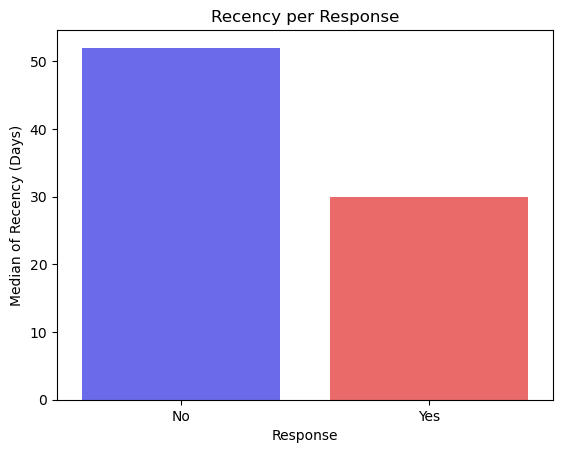

In [72]:
df_agg=df.groupby('Response')['Recency'].median().reset_index()
plt.title('Recency per Response')
sns.barplot(x='Response',y='Recency', data=df_agg, palette='seismic')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Response')
plt.ylabel('Median of Recency (Days)')
plt.show()

Based on the visualizations the latest campaign affect the recency of the customer. Conduct Mann-Whitney U-test to test whether `Response` are statistically significant to `Recency`.

`Assumption` : There is significant difference between median **Recency** of the customer who responded to the latest campaign (**Response=1**) and those who did not respond (**Response=0**).
    
`Hypothesis` :
    
$H_{0} : M_{1} = M_{2}$

$H_{a} : M_{1} \neq M_{2}$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [75]:
e=0.05 #margin of error
N=len(df)
n=round(N/(1+N*(e**2))) #no. of sample


df1=df.sample(n)
df1

# Mann-Whitney Test
result = list(mannwhitneyu(
    df1[df1['Response'] == 0]['Recency'],
    df1[df1['Response'] == 1]['Recency'],
    alternative = 'two-sided'
))

print('n :', n)
print('U-Statistic:', result[0])
print('P-Value:', result[1])

n : 339
U-Statistic: 8600.0
P-Value: 0.0011884017170065004


P-Value < 0.05, reject H0, which means `Response` is statistically significant to `Recency`. The latest campaign clearly affect the customer recency. Relations between numerical columns can be checked using correlation heat map (hence, `Recency` columns with other numerical variable). First, check the data relationship using pair plot,

In [ ]:
# # Select the variables to check for monotonic relationships
# variables = [
#     'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
#     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
#     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
#     'NumWebVisitsMonth', 'Children', 'Age', 'TotalMnt', 
#     'TotalPerishableMnt', 'TotalLuxuryMnt', 'Count'
# ]

# # Create the pair plot (scatter plots)
# sns.pairplot(df[variables], kind='scatter', diag_kind='hist', plot_kws={'alpha':0.6})

# # Show the plot
# plt.show()

Since the data are mostly monotonic and not normally distributed, spearman method are used for correlation heat map,

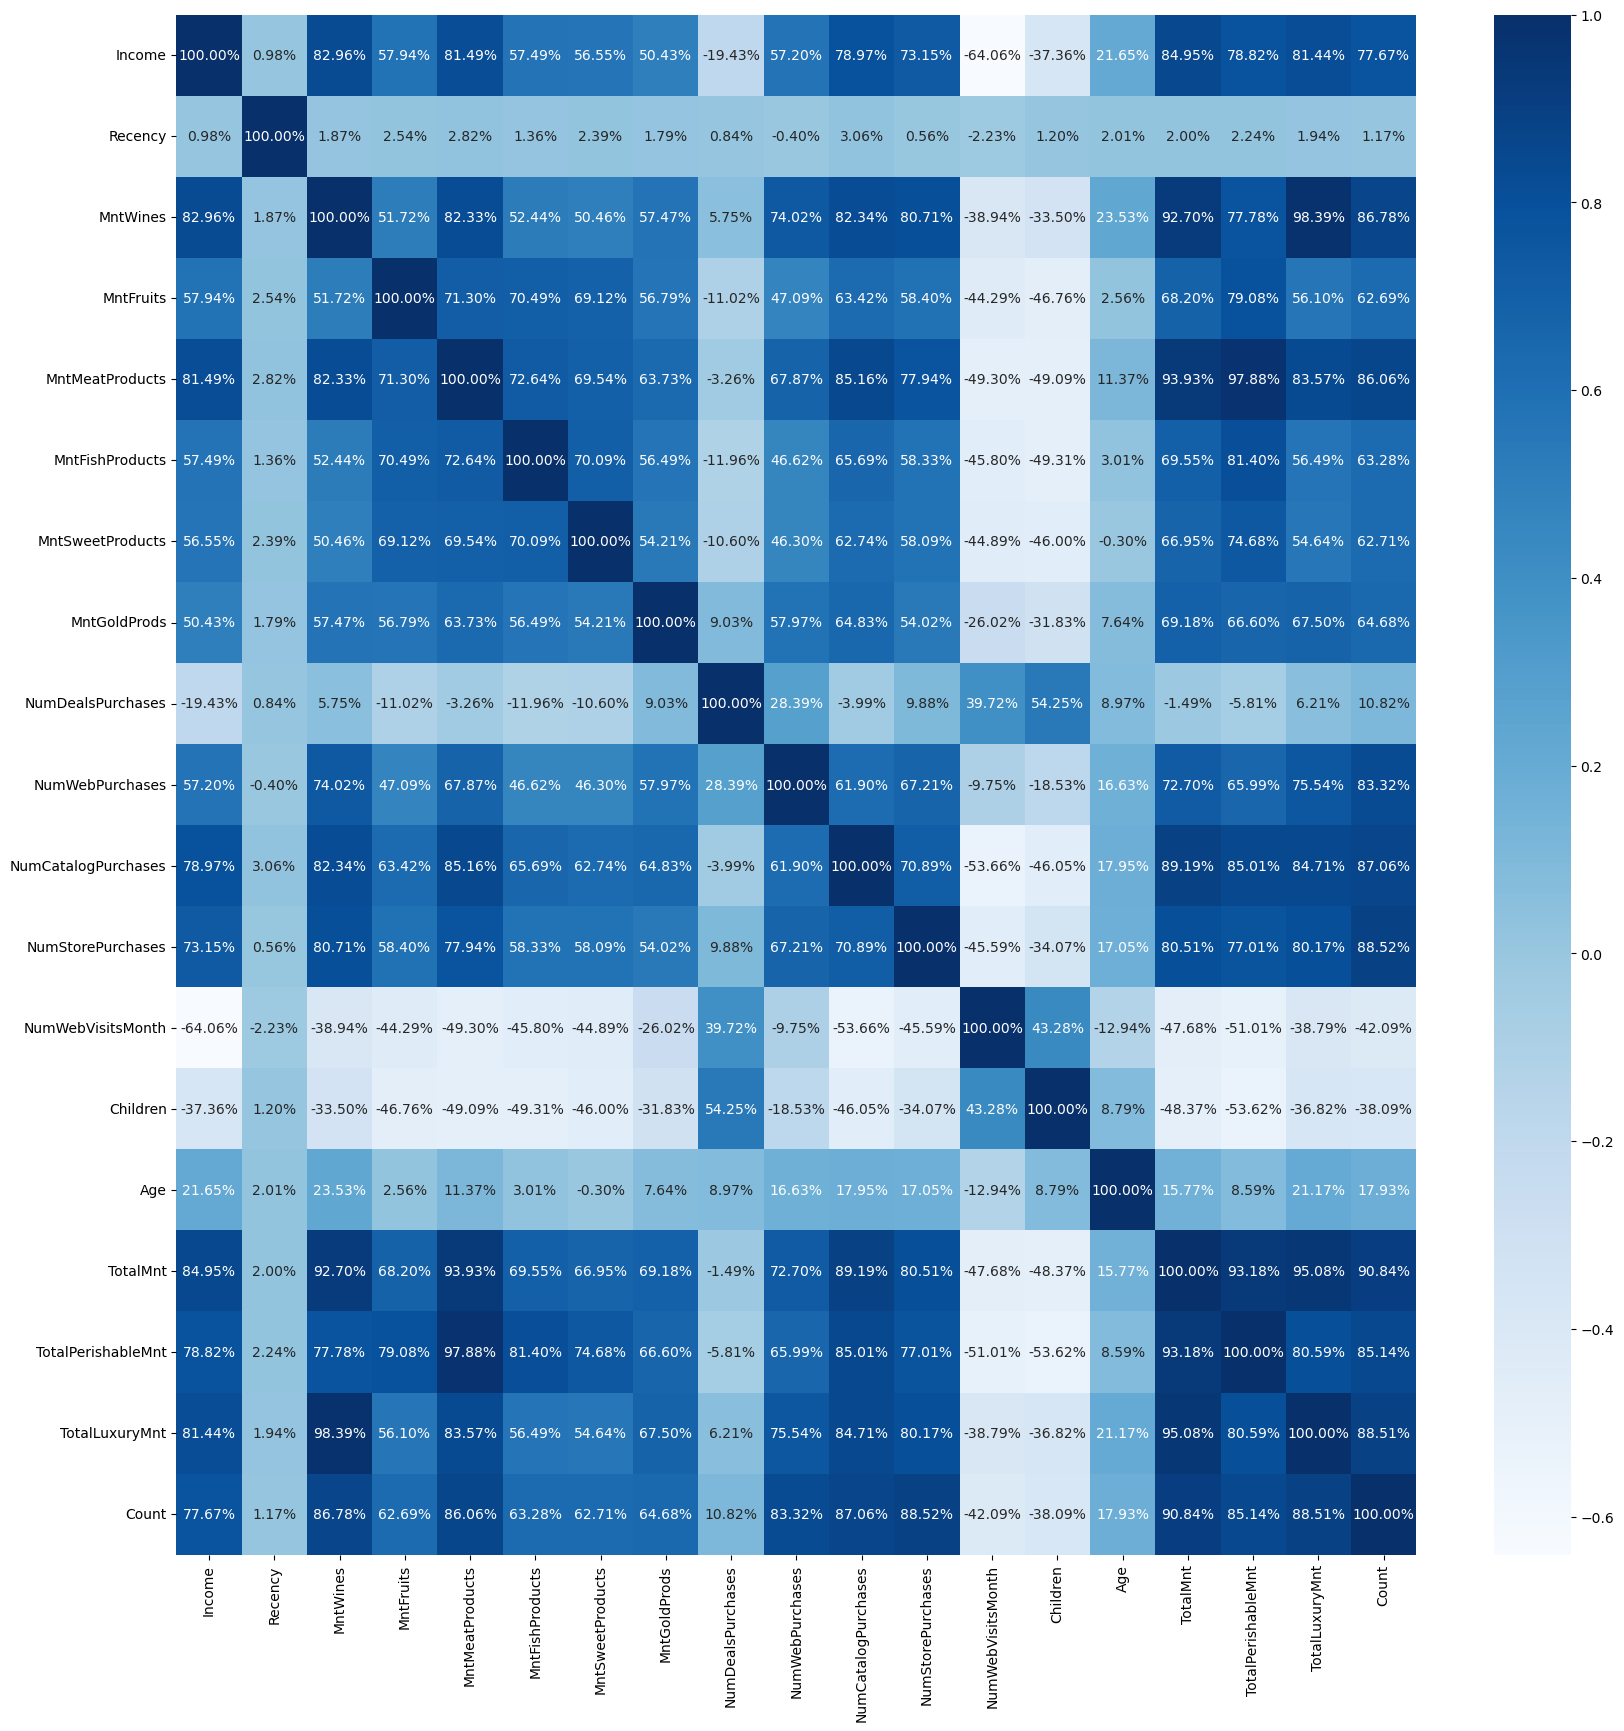

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Children', 'Age', 'TotalMnt',
       'TotalPerishableMnt', 'TotalLuxuryMnt', 'Count']].corr(method='spearman'),annot=True, fmt='.2%', cmap = 'Blues' )
plt.show()

The correlation heat map imply that there are no correlations between `Recency` and the other numerical columns. Next check the relation between recency and demography.

**RECENCY VS EDUCATION**

In [80]:
recency_1 = df[df['Education'] == 'Graduate']['Recency']
recency_2 = df[df['Education'] == 'Postgraduate']['Recency']
recency_3 = df[df['Education'] == 'Undergraduate']['Recency']

p_val_1 = normaltest(recency_1)[1]
if p_val_1 <= 0.05:
    print(f"For Education = Graduate: p-value = {p_val_1:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Education = Graduate: p-value = {p_val_1:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

p_val_2 = normaltest(recency_2)[1]
if p_val_2 <= 0.05:
    print(f"For Education = Postgraduate: p-value = {p_val_2:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Education = Postraduate: p-value = {p_val_2:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

p_val_3 = normaltest(recency_3)[1]
if p_val_3 <= 0.05:
    print(f"For Education = Undergraduate: p-value = {p_val_3:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Education = Underraduate: p-value = {p_val_3:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

For Education = Graduate: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.
For Education = Postgraduate: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.
For Education = Underraduate: p-value = 0.07268. Since p-value > 0.05, the 'Recency' column is normally distributed.


Two groups are not normally distributed, hence median are used.

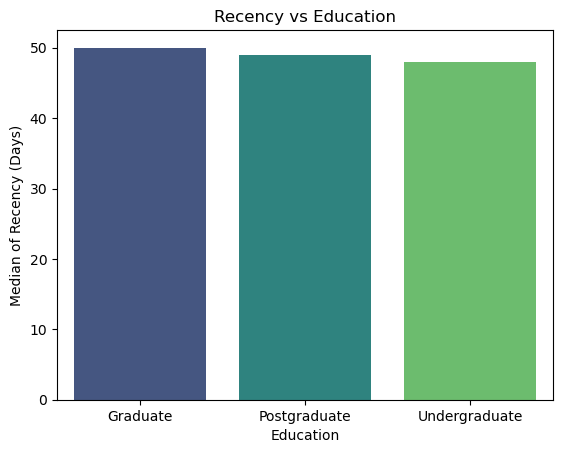

In [82]:
df_agg=df.groupby('Education')['Recency'].median().reset_index()
plt.title('Recency vs Education')
sns.barplot(x='Education',y='Recency', data=df_agg, palette='viridis')
plt.xlabel('Education')
plt.ylabel('Median of Recency (Days)')
plt.show()

The difference are small. Hence, statistical test are needed to check whether the difference is significant/not. Since the data are not normally distributed, i use Kruskal-Wallis test.

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in the median of recency across the education group (undegraduate, graduate, postgraduate).

$H_{a}$ : At least one education group differs significantly from others$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [85]:
e=0.01 #margin of error
N=len(df)
n=round(N/(1+N*(e**2))) #no. of sample


df1=df.sample(n)

In [86]:
from scipy.stats import kruskal
kruskal(df1[df1['Education']=='Undergraduate']['Recency'],
        df1[df1['Education']=='Graduate']['Recency'],
        df1[df1['Education']=='Postgraduate']['Recency'])

KruskalResult(statistic=1.2871023881861234, pvalue=0.52542322720622)

P-value > 0.05, failed to reject H0, There is no significant difference in the recency across the education group (undegraduate, graduate, postgraduate).

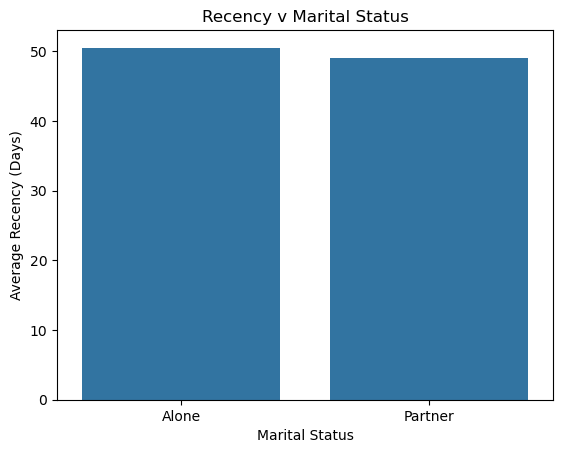

In [90]:
df_agg=df.groupby('Marital_Status')['Recency'].median().reset_index()
plt.title('Recency v Marital Status')
sns.barplot(x='Marital_Status',y='Recency', data=df_agg)
plt.xlabel('Marital Status')
plt.ylabel('Average Recency (Days)')
plt.show()

In [91]:
df_agg

Marital_Status  Recency
0          Alone    50.50
1        Partner    49.00

**GENERATIONS VS RECENCY**

In [93]:
recency_1 = df[df['Generations'] == 'Baby Boomers']['Recency']
recency_2 = df[df['Generations'] == 'Gen X']['Recency']
recency_3 = df[df['Generations'] == 'Millenials']['Recency']

p_val_1 = normaltest(recency_1)[1]
if p_val_1 <= 0.05:
    print(f"For Baby Boomers: p-value = {p_val_1:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Baby Boomers: p-value = {p_val_1:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

p_val_2 = normaltest(recency_2)[1]
if p_val_2 <= 0.05:
    print(f"For Gen X: p-value = {p_val_2:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Gen X: p-value = {p_val_2:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

p_val_3 = normaltest(recency_3)[1]
if p_val_3 <= 0.05:
    print(f"For Millenials: p-value = {p_val_3:.5f}. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.")
else:
    print(f"For Millenials: p-value = {p_val_3:.5f}. Since p-value > 0.05, the 'Recency' column is normally distributed.")

For Baby Boomers: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.
For Gen X: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.
For Millenials: p-value = 0.00000. Since p-value ≤ 0.05, the 'Recency' column is not normally distributed.


Median will be used for the analysis,

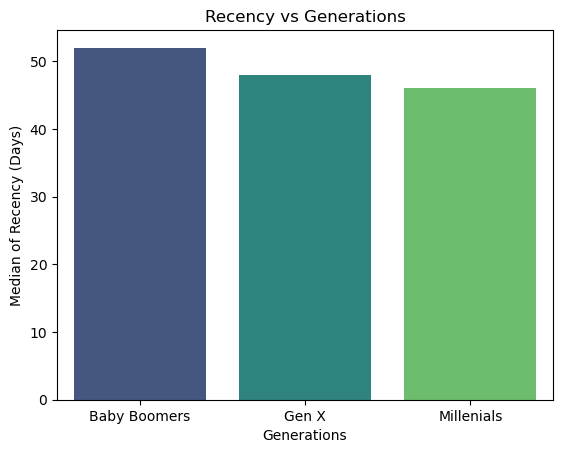

In [95]:
df_agg=df.groupby('Generations')['Recency'].median().reset_index()
plt.title('Recency vs Generations')
sns.barplot(x='Generations',y='Recency', data=df_agg, palette='viridis')
plt.xlabel('Generations')
plt.ylabel('Median of Recency (Days)')
plt.show()

The visualizations imply that there are difference between each generations, but the difference is not big enough that we can not draw conclusion yet. As the data are not normally distributed, kruskal-wallis test will be used to check the significance,

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in the median of recency across the generations.

$H_{a}$ : At least one generations differs significantly from others$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [98]:
e=0.01 #margin of error
N=len(df)
n=round(N/(1+N*(e**2)))#no. of sample


df1=df.sample(n)
# df1

In [99]:
from scipy.stats import kruskal
kruskal(df1[df1['Generations']=='Baby Boomers']['Recency'],
        df1[df1['Generations']=='Gen X']['Recency'],
        df1[df1['Generations']=='Millenials']['Recency'])

KruskalResult(statistic=0.877162323720798, pvalue=0.6449508530827611)

P-value > 0,05, failed to reject H0. There is no significant difference in the recency across the generations.

So far, only `Response` that has significant relation to `Recency`. The campaign will be analyzed, but before that, we will analyze the relationship of frequency of the customer purchases `Count`.

**FREQUENCY VS RESPONSE**

In [103]:
response_1 = df[df['Response'] == 1]['Count']
response_0 = df[df['Response'] == 0]['Count']

# Normality test for Response = 1
p_val_1 = normaltest(response_1)[1]
if p_val_1 <= 0.05:
    print(f"For Response = 1: p-value = {p_val_1:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Response = 1: p-value = {p_val_1:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

# Normality test for Response = 0
p_val_0 = normaltest(response_0)[1]
if p_val_0 <= 0.05:
    print(f"For Response = 0: p-value = {p_val_0:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Response = 0: p-value = {p_val_0:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

For Response = 1: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.
For Response = 0: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.


Using median for the analysis,

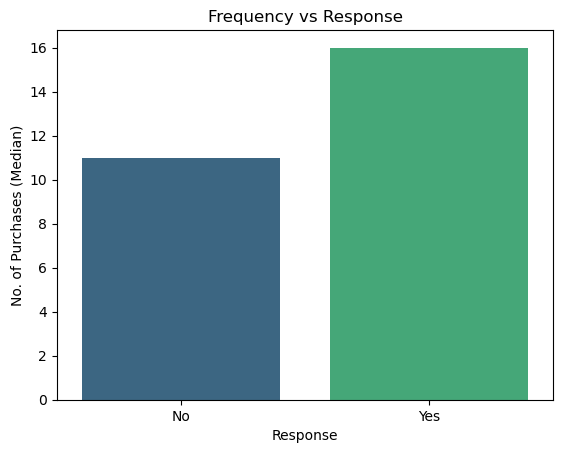

In [105]:
df_agg=df.groupby('Response')['Count'].median().reset_index()
plt.title('Frequency vs Response')
sns.barplot(x='Response',y='Count', data=df_agg, palette = 'viridis')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Response')
plt.ylabel('No. of Purchases (Median)')
plt.show()

The visualizations imply that customers that responded to the latest campaign has higher number of purchases (median) than those who did not respond, as it should be.

**FREQUENCY VS EDUCATION**

In [110]:
freq_1 = df[df['Education'] == 'Graduate']['Count']
freq_2 = df[df['Education'] == 'Postgraduate']['Count']
freq_3 = df[df['Education'] == 'Undergraduate']['Count']

p_val_1 = normaltest(freq_1)[1]
if p_val_1 <= 0.05:
    print(f"For Education = Graduate: p-value = {p_val_1:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Education = Graduate: p-value = {p_val_1:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

p_val_2 = normaltest(freq_2)[1]
if p_val_2 <= 0.05:
    print(f"For Education = Postgraduate: p-value = {p_val_2:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Education = Postraduate: p-value = {p_val_2:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

p_val_3 = normaltest(freq_3)[1]
if p_val_3 <= 0.05:
    print(f"For Education = Undergraduate: p-value = {p_val_3:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Education = Underraduate: p-value = {p_val_3:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

For Education = Graduate: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.
For Education = Postgraduate: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.
For Education = Undergraduate: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.


Using median for the analysis,

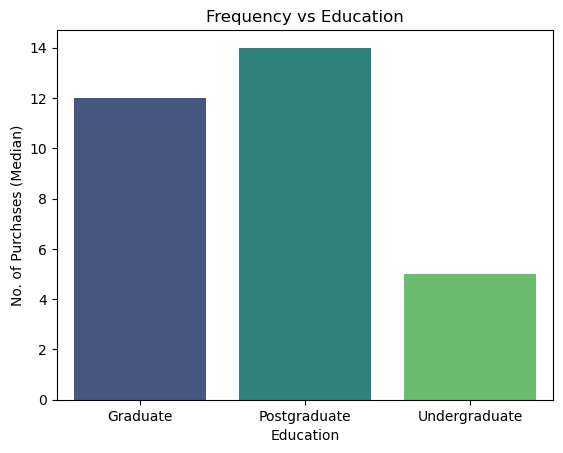

In [112]:
df_agg=df.groupby('Education')['Count'].median().reset_index()
plt.title('Frequency vs Education')
sns.barplot(x='Education',y='Count', data=df_agg, palette='viridis')
plt.xlabel('Education')
plt.ylabel('No. of Purchases (Median)')
plt.show()

The visualization imply that there are difference of number of purchases between each education group. The significance will be tested using Kruskal-Wallis method.

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in the median of number of purchases across the education group.

$H_{a}$ : At least one education group differs significantly from others$

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [115]:
e=0.01 #margin of error
N=len(df)
n=round(N/(1+N*(e**2))) #no. of sample


df1=df.sample(n)

In [116]:
kruskal(df1[df1['Education']=='Undergraduate']['Count'],
        df1[df1['Education']=='Graduate']['Count'],
        df1[df1['Education']=='Postgraduate']['Count'])

KruskalResult(statistic=54.15174170338473, pvalue=1.7422027558725556e-12)

As p-value < 0.05, at least one education group differs significantly from others. We can conclude that education level affect the number of purchases of the customer, with undergraduate as the lowest.

**FREQUENCY PER DEMOGRAPHY**

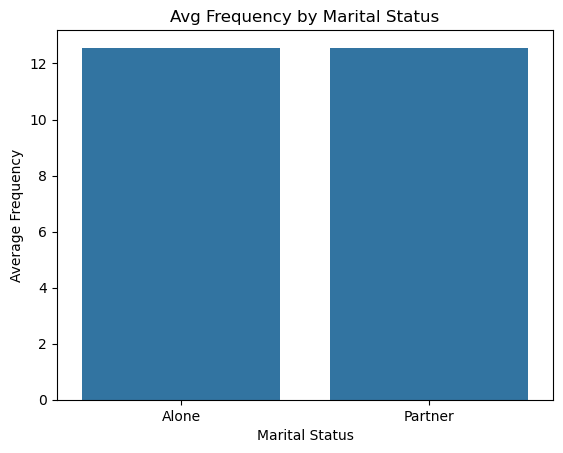

In [119]:
df_agg=df.groupby('Marital_Status')['Count'].mean().reset_index()
plt.title('Avg Frequency by Marital Status')
sns.barplot(x='Marital_Status',y='Count', data=df_agg)
plt.xlabel('Marital Status')
plt.ylabel('Average Frequency')
plt.show()

**FREQUENCY VS GENERATIONS**

In [121]:
freq_1 = df[df['Generations'] == 'Baby Boomers']['Count']
freq_2 = df[df['Generations'] == 'Gen X']['Count']
freq_3 = df[df['Generations'] == 'Millenials']['Count']

p_val_1 = normaltest(freq_1)[1]
if p_val_1 <= 0.05:
    print(f"For Baby Boomers: p-value = {p_val_1:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Baby Boomers: p-value = {p_val_1:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

p_val_2 = normaltest(freq_2)[1]
if p_val_2 <= 0.05:
    print(f"For Gen X: p-value = {p_val_2:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Gen X: p-value = {p_val_2:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

p_val_3 = normaltest(freq_3)[1]
if p_val_3 <= 0.05:
    print(f"For Millenials: p-value = {p_val_3:.5f}. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.")
else:
    print(f"For Millenials: p-value = {p_val_3:.5f}. Since p-value > 0.05, the 'Count' column is normally distributed.")

For Baby Boomers: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.
For Gen X: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.
For Millenials: p-value = 0.00000. Since p-value ≤ 0.05, the 'Count' column is not normally distributed.


Median will be used for the analysis,

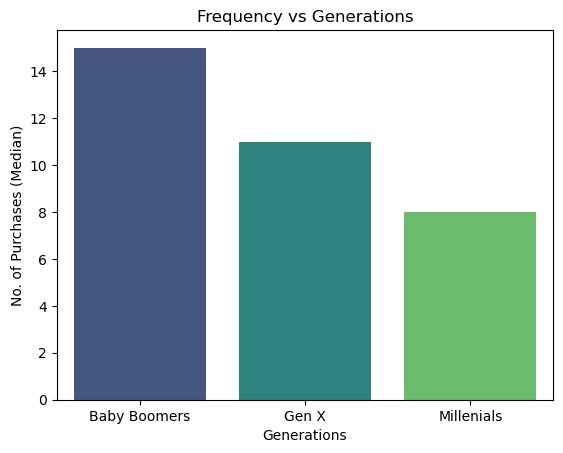

In [123]:
df_agg=df.groupby('Generations')['Count'].median().reset_index()
plt.title('Frequency vs Generations')
sns.barplot(x='Generations',y='Count', data=df_agg, palette='viridis')
plt.xlabel('Generations')
plt.ylabel('No. of Purchases (Median)')
plt.show()

The visualizations imply that there are difference between each generations, the difference should be big enough. To prove its significance, hypothesis testing with kruskal-wallis test are conducted,

`Hypothesis` :
    
$H_{0}$ : There is no significant difference in the median of number of purchases across the generations.

$H_{a}$ : At least one generations differs significantly from others

`Significance` 
$\alpha=0.05$

`Conclusion` :
- p-value $\leq \alpha$ : Reject $H_{0}$ 
- p-value $> \alpha$ : Failed to Reject $H_{0}$ 

In [126]:
e=0.01 #margin of error
N=len(df)
n=round(N/(1+N*(e**2)))#no. of sample


df1=df.sample(n)
# df1

In [127]:
kruskal(df1[df1['Generations']=='Baby Boomers']['Count'],
        df1[df1['Generations']=='Gen X']['Count'],
        df1[df1['Generations']=='Millenials']['Count'])

KruskalResult(statistic=57.968859698205016, pvalue=2.583580841757028e-13)

P-value > 0,05, at least one generations differ significantly with other. Combined it the visualizations earlier, we can conclude that customer's generations affect the number of customer purchases.

Next, check correlation between `Count` and numerical columns, using correlations heat map.

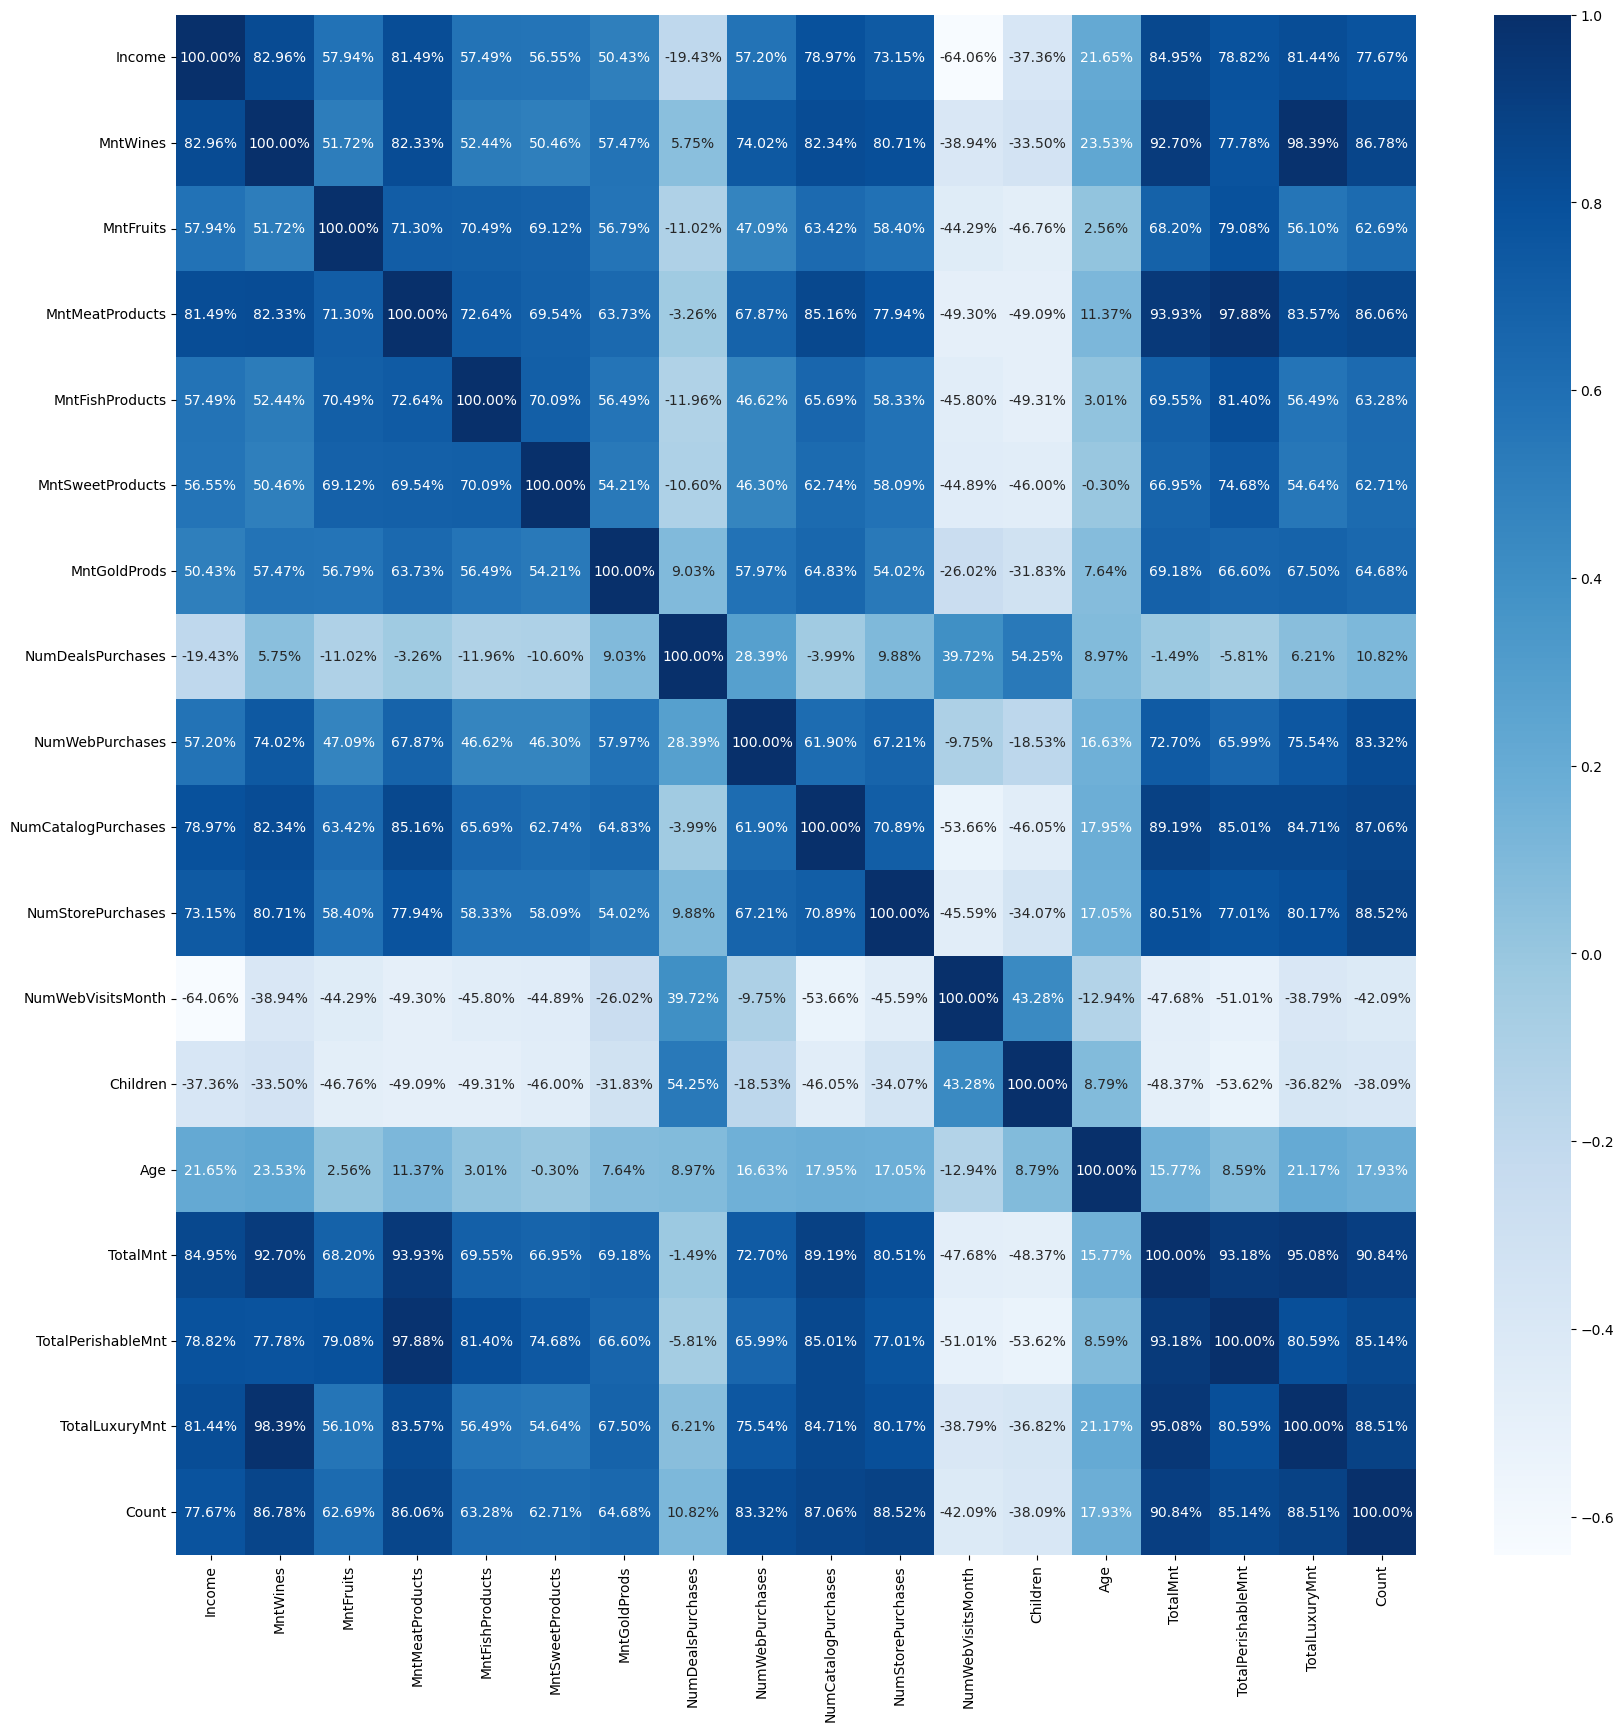

In [130]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Children', 'Age', 'TotalMnt',
       'TotalPerishableMnt', 'TotalLuxuryMnt', 'Count']].corr(method='spearman'),annot=True, fmt='.2%', cmap = 'Blues' )
plt.show()

In general, `Count` clearly correlates with number of purchases in each product segment and channels, as well as the monetary columns 'mnt'. But, `Count` has weak correlations with `NumDealsPurchases` and negative correlations with `NumWebVisitsMonth`. These findings imply that the discount/promo did not contribute significantly to the customer frequency purchases. Moreover, customer that often visits the store's website are less likely to buy product compared to customer that did not visit. Since younger generations tend to visit website more, this might indicate that there are campaign problem for millenials customer (younger generation) that needs to be investigated.

**MONETARY**

Despite monetary is not our main priority in this analysis, understanding the monetary of our customer are still beneficial to develop recommendation.

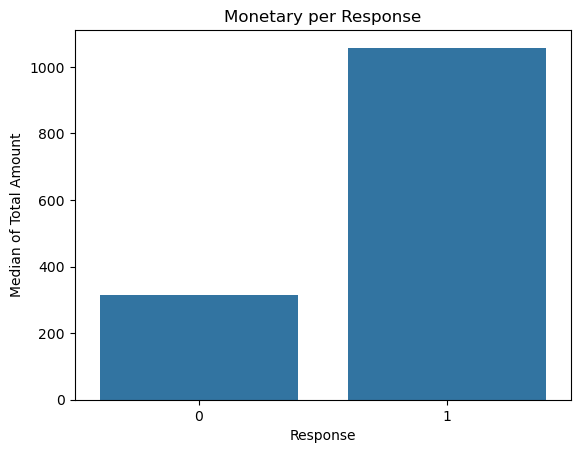

In [380]:
df_agg=df.groupby('Response')['TotalMnt'].median().reset_index()
plt.title('Monetary per Response')
sns.barplot(x='Response',y='TotalMnt', data=df_agg)
plt.xlabel('Response')
plt.ylabel('Median of Total Amount')
plt.show()

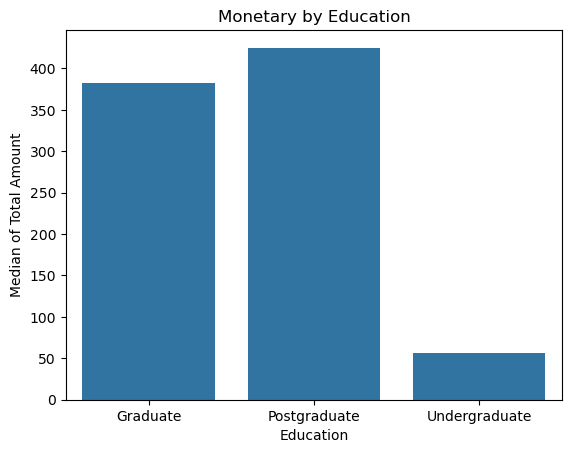

In [382]:
df_agg=df.groupby('Education')['TotalMnt'].median().reset_index()
plt.title('Monetary by Education')
sns.barplot(x='Education',y='TotalMnt', data=df_agg)
plt.xlabel('Education')
plt.ylabel('Median of Total Amount')
plt.show()

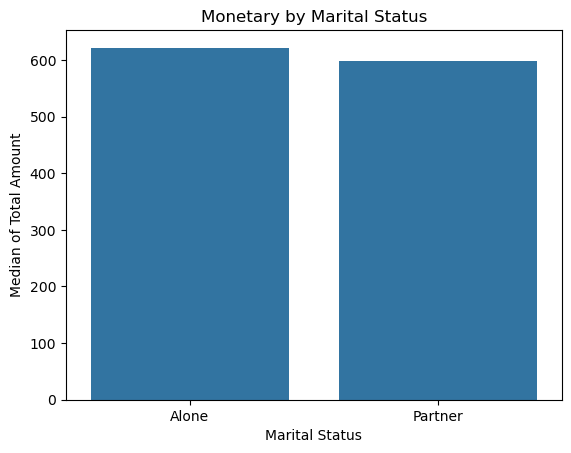

In [386]:
df_agg=df.groupby('Marital_Status')['TotalMnt'].mean().reset_index()
plt.title('Monetary by Marital Status')
sns.barplot(x='Marital_Status',y='TotalMnt', data=df_agg)
plt.xlabel('Marital Status')
plt.ylabel('Median of Total Amount')
plt.show()

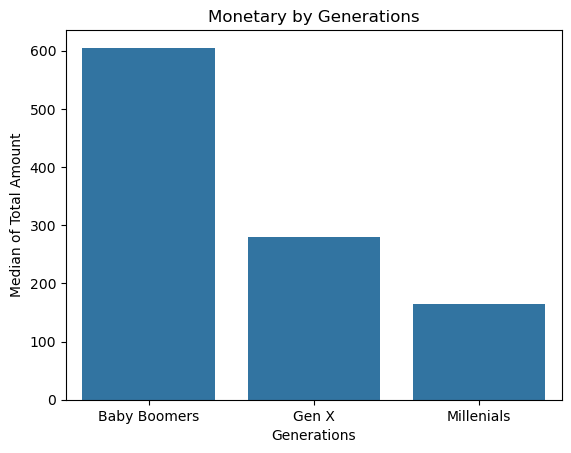

In [388]:
df_agg=df.groupby('Generations')['TotalMnt'].median().reset_index()
plt.title('Monetary by Generations')
sns.barplot(x='Generations',y='TotalMnt', data=df_agg)
plt.xlabel('Generations')
plt.ylabel('Median of Total Amount')
plt.show()

Based on these visualizations, younger customer have lower total amount of purchases. Hence, focusing on older generations seems more lucrative than the younger one, at least in short-term purposes.

**RESPONSE VS EDUCATION**

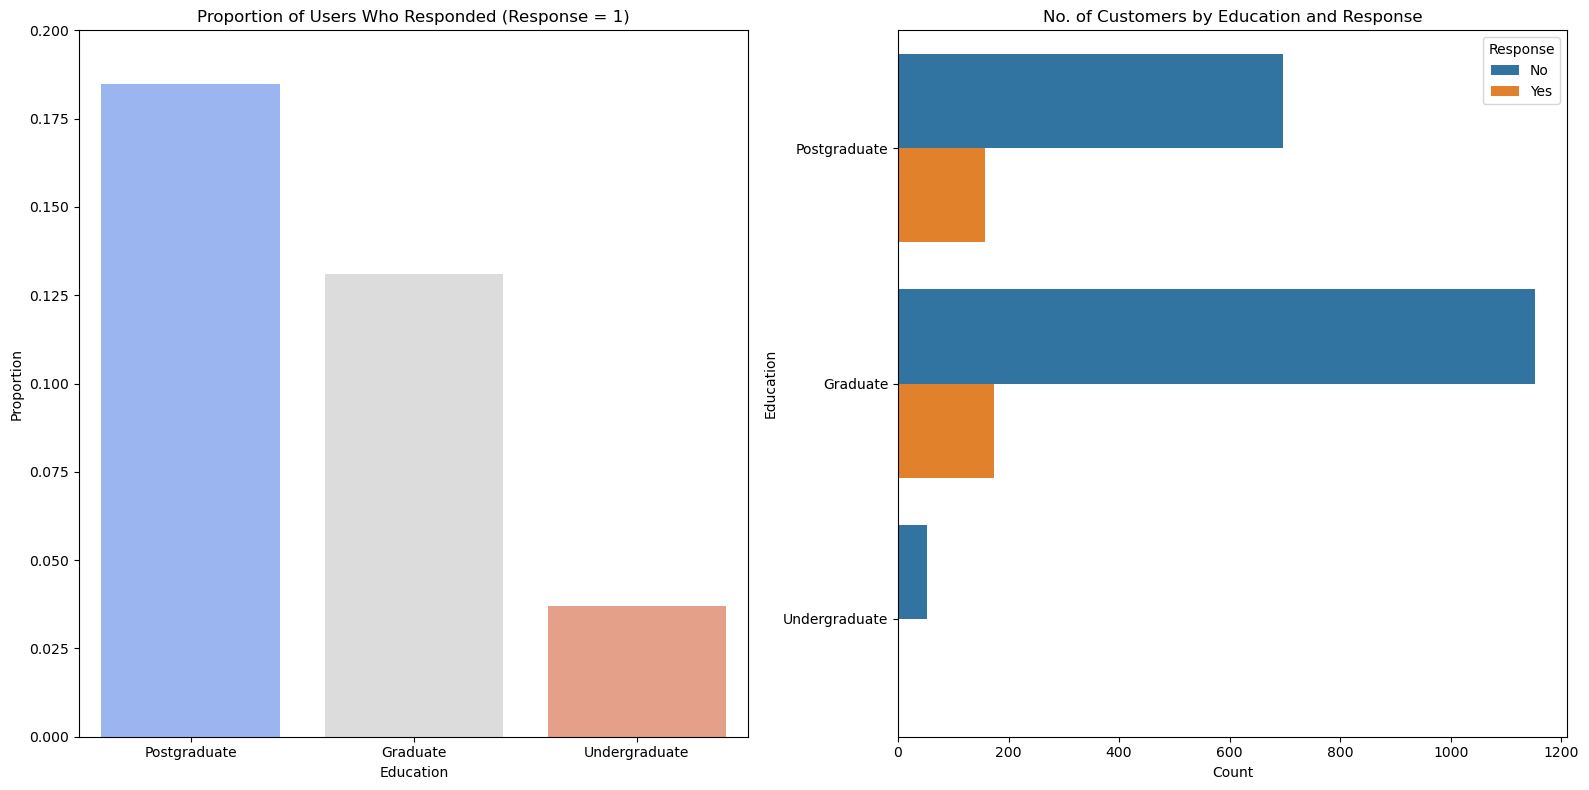

In [145]:
# Sort Education categories
education_order = ['Postgraduate', 'Graduate', 'Undergraduate']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Left Subplot: Proportion of Responses ---
# Calculate the proportion of Response = 1 per education category
response_rate = df[df['Response'] == 1]['Education'].value_counts() / df['Education'].value_counts()
response_rate = response_rate.reindex(education_order)

# Plot the proportions
sns.barplot(x=response_rate.index, y=response_rate.values, ax=axes[0], palette='coolwarm')
axes[0].set_title('Proportion of Users Who Responded (Response = 1)')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Proportion')
axes[0].set_ylim(0, 0.2)

# --- Right Subplot: Horizontal Bar Plot ---
sns.countplot(data=df, y='Education', hue='Response', order=education_order, ax=axes[1])
# Customize the legend
axes[1].legend(title='Response', labels=['No', 'Yes'])
axes[1].set_title('No. of Customers by Education and Response')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Education')

# Show the plots
plt.tight_layout()
plt.show()

Pairwise double population proportion z-test are used to check the significance of the educations to proportions of the customer that accepted latest campaign.

In [147]:
df_undergraduate = df[df['Education']=='Undergraduate']
df_graduate = df[df['Education']=='Graduate']
df_postgraduate = df[df['Education']=='Postgraduate']
e=0.01 #margin of error

N1=len(df_undergraduate)
n1=round(N1/(1+N1*(e**2)))
df_undergraduate_s=df_undergraduate.sample(n1) #no of sample
p1_hat=len(df_undergraduate_s[df_undergraduate_s['Response']==1])/len(df_undergraduate_s)

N2=len(df_graduate)
n2=round(N2/(1+N2*(e**2)))
df_graduate_s=df_graduate.sample(n2) #no of sample
p2_hat=len(df_graduate_s[df_graduate_s['Response']==1])/len(df_graduate_s)

N3=len(df_postgraduate)
n3=round(N3/(1+N3*(e**2)))
df_postgraduate_s=df_postgraduate.sample(n3) #no of sample
p3_hat=len(df_postgraduate_s[df_postgraduate_s['Response']==1])/len(df_postgraduate_s)

In [148]:
from statsmodels.stats.proportion import proportions_ztest
import itertools

# Data: Number of successes and sample sizes for 3 groups
successes = [p1_hat*n1, p2_hat*n2, p3_hat*n3]
nobs = [n1, n2, n3]

# Perform pairwise Double Population Proportion Z-tests 
for (i, j) in itertools.combinations(range(len(successes)), 2):
    stat, p_value = proportions_ztest([successes[i], successes[j]], [nobs[i], nobs[j]])
    print(f"Comparison between Group {i+1} and Group {j+1}:")
    print(f"  Z-statistic: {stat:.4f}, P-value: {p_value:.4f}\n")

Comparison between Group 1 and Group 2:
  Z-statistic: -1.9828, P-value: 0.0474

Comparison between Group 1 and Group 3:
  Z-statistic: -2.7850, P-value: 0.0054

Comparison between Group 2 and Group 3:
  Z-statistic: -3.5452, P-value: 0.0004



As all the p-values < 0.05, we can conclude that education did affect the number of customer that responded to the latest campaign, as the visualization shows that 

**RESPONSE VS GENERATIONS**

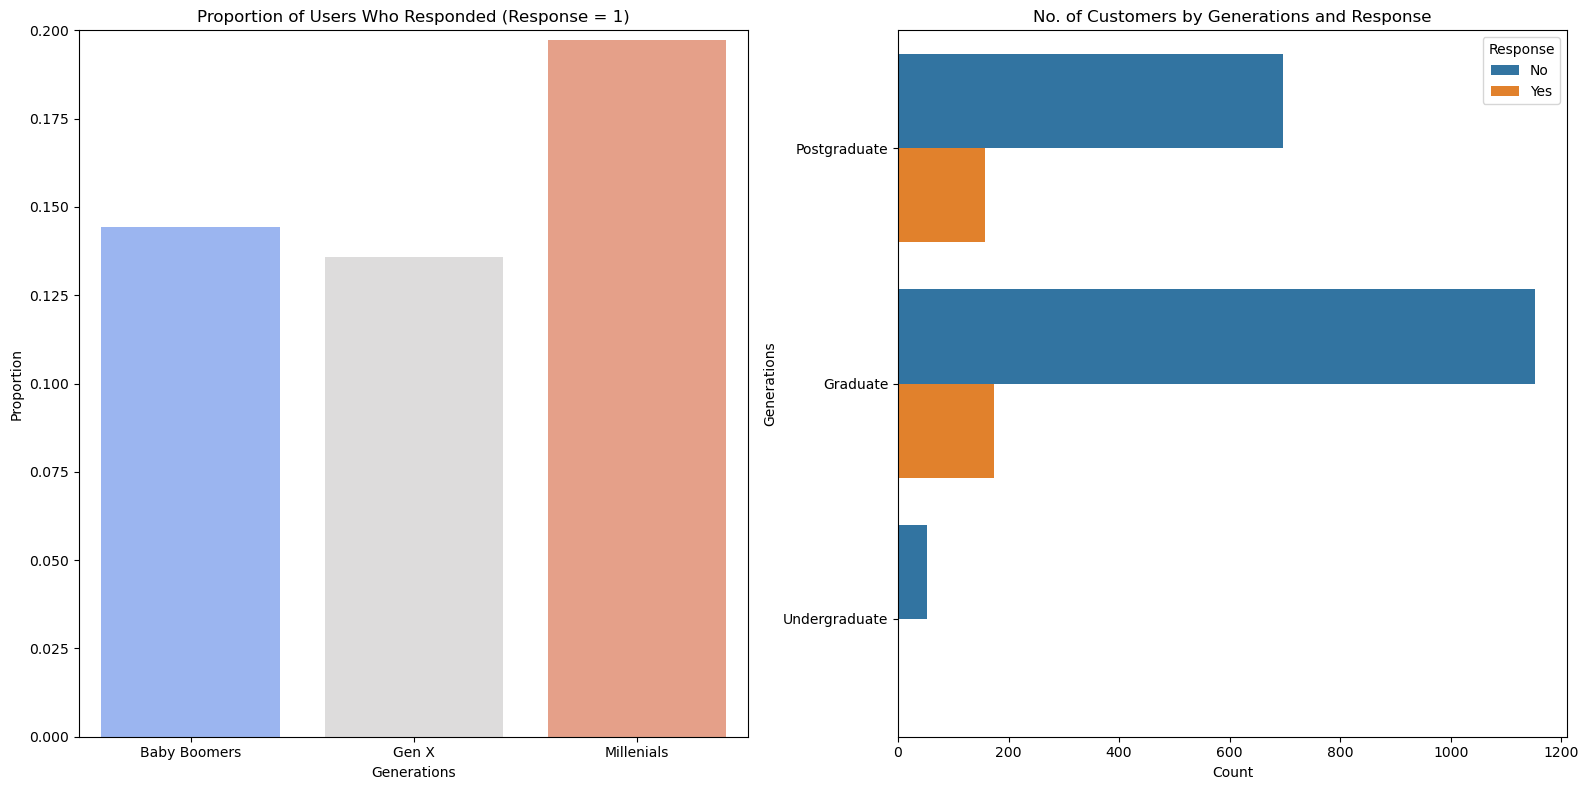

In [151]:
# Sort Education categories
gen_order = ['Baby Boomers', 'Gen X', 'Millenials']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Left Subplot: Proportion of Responses ---
response_rate = df[df['Response'] == 1]['Generations'].value_counts() / df['Generations'].value_counts()
response_rate = response_rate.reindex(gen_order)

# Plot the proportions
sns.barplot(x=response_rate.index, y=response_rate.values, ax=axes[0], palette='coolwarm')
axes[0].set_title('Proportion of Users Who Responded (Response = 1)')
axes[0].set_xlabel('Generations')
axes[0].set_ylabel('Proportion')
axes[0].set_ylim(0, 0.2)

# --- Right Subplot: Horizontal Bar Plot ---
sns.countplot(data=df, y='Education', hue='Response', order=education_order, ax=axes[1])
# Customize the legend
axes[1].legend(title='Response', labels=['No', 'Yes'])
axes[1].set_title('No. of Customers by Generations and Response')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Generations')

# Show the plots
plt.tight_layout()
plt.show()

In [152]:
df_boomer = df[df['Generations']=='Baby Boomers']
df_genx = df[df['Generations']=='Gen X']
df_millenial = df[df['Generations']=='Millenials']
e=0.01

N1=len(df_boomer)
n1=round(N1/(1+N1*(e**2)))
df_boomer_s=df_boomer.sample(n1)
p1_hat=len(df_boomer_s[df_boomer_s['Response']==1])/len(df_boomer_s)

N2=len(df_genx)
n2=round(N2/(1+N2*(e**2)))
df_genx_s=df_genx.sample(n2)
p2_hat=len(df_genx_s[df_genx_s['Response']==1])/len(df_genx_s)

N3=len(df_millenial)
n3=round(N3/(1+N3*(e**2)))
df_millenial_s=df_millenial.sample(n3)
p3_hat=len(df_millenial_s[df_millenial_s['Response']==1])/len(df_millenial_s)

In [153]:
from statsmodels.stats.proportion import proportions_ztest
import itertools

# Data: Number of successes and sample sizes for 3 groups
successes = [p1_hat*n1, p2_hat*n2, p3_hat*n3]
nobs = [n1, n2, n3]

# Perform pairwise Double Population Proportion Z-tests 
for (i, j) in itertools.combinations(range(len(successes)), 2):
    stat, p_value = proportions_ztest([successes[i], successes[j]], [nobs[i], nobs[j]])
    print(f"Comparison between Group {i+1} and Group {j+1}:")
    print(f"  Z-statistic: {stat:.4f}, P-value: {p_value:.4f}\n")

Comparison between Group 1 and Group 2:
  Z-statistic: 0.1572, P-value: 0.8751

Comparison between Group 1 and Group 3:
  Z-statistic: -2.4080, P-value: 0.0160

Comparison between Group 2 and Group 3:
  Z-statistic: -2.6718, P-value: 0.0075



The test imply that there are no significant difference between baby boomers and gen x. However, millenials are significantly different to the others generations. This generations has higher response rate than the other generations. Despite of that, as the purchases frequency and monetary of this generations are lower, this might indicate that the campaign are mistargeted.

<Axes: xlabel='Marital_Status', ylabel='count'>

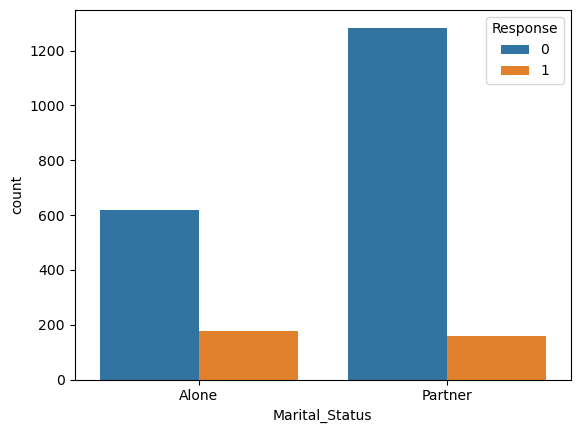

In [155]:
sns.countplot(data=df,x='Marital_Status',hue='Response')

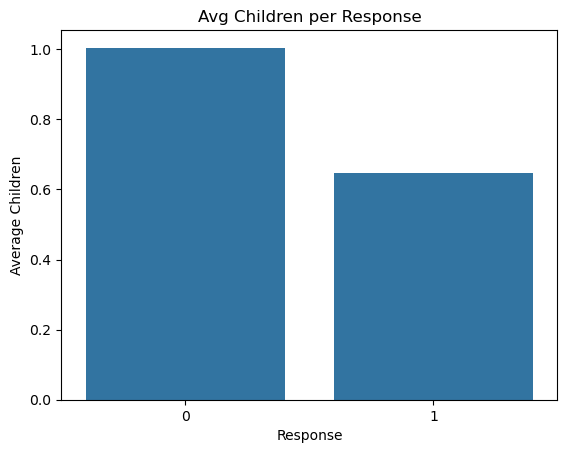

In [156]:
df_agg=df.groupby('Response')['Children'].mean().reset_index()
plt.title('Avg Children per Response')
sns.barplot(x='Response',y='Children', data=df_agg)
plt.xlabel('Response')
plt.ylabel('Average Children')
plt.show()

**CAMPAIGNS per GENERATIONS TREND**

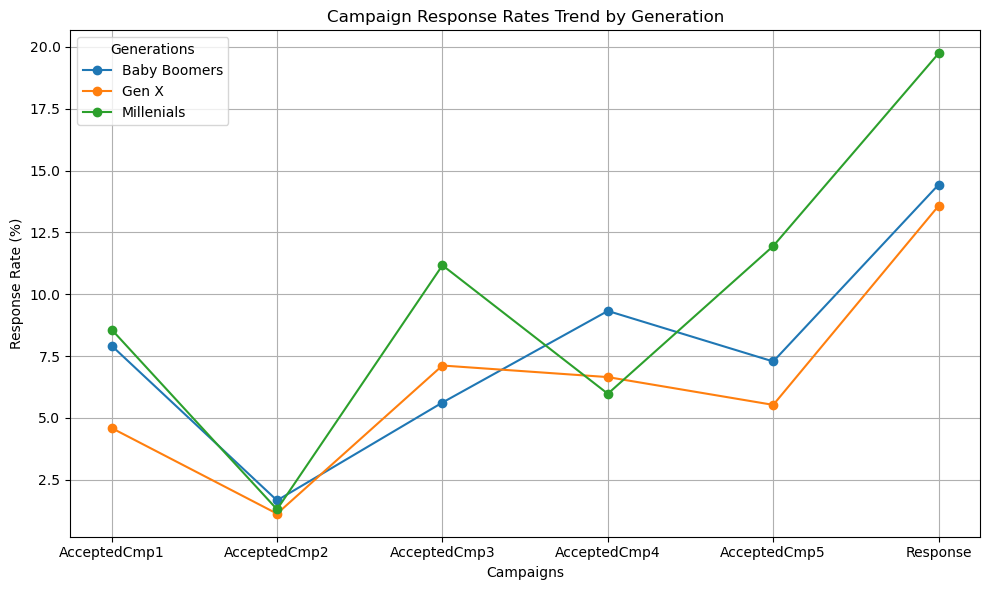

In [342]:
# 1. Calculate Campaign Response Rates by Generations
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
response_rates = df.groupby('Generations')[campaign_columns].mean() * 100  # Convert to percentage

# 2. Plot all generations on a single plot
plt.figure(figsize=(10, 6))
for gen in response_rates.index:
    plt.plot(campaign_columns, response_rates.loc[gen], marker='o', label=f'{gen}')

# Add labels and title
plt.title('Campaign Response Rates Trend by Generation')
plt.xlabel('Campaigns')
plt.ylabel('Response Rate (%)')
plt.legend(title='Generations')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

4 out of 6 campaigns that the company had already conducted, millenials has the highest response rate across all the generations, despite having lower frequency and monetary value. This might indicate that the millenials response rate did not convert well into customer purchases, that needs to be investigated.

In [346]:
# Reshape the table to long format using melt
response_rates_long = response_rates.reset_index().melt(id_vars='Generations', var_name='Campaign', value_name='Response Rate')

# Save the reshaped table to a CSV file for Tableau
response_rates_long.to_csv('campaign_response_rates_for_tableau.csv', index=False)

# Confirm the save
print("CSV file saved successfully!")

CSV file saved successfully!


**DISCOUNT EFFECTIVENESS**

Check relation between `NumDealsPurchases` and `Recency`,

<Axes: xlabel='Recency', ylabel='NumDealsPurchases'>

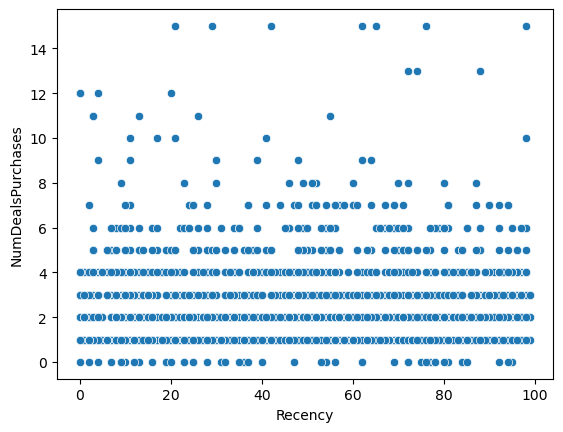

In [184]:
sns.scatterplot(data=df, x='Recency', y='NumDealsPurchases')

Based on the scatter plot earlier, there are no relations between number of purchases with discount and customer recency. Next, check relation between number of purchases with discount and `Response`

In [185]:
df_agg=df.groupby('Response')['NumDealsPurchases'].median()
df_agg

Response
0   2.00
1   1.00
Name: NumDealsPurchases, dtype: float64

The difference are small, we can assume that discount did not affect number of customer that responded to latest campaign. There is indication that the discount did not have impact to customer purchasing behaviour, and needs to be evaluated.

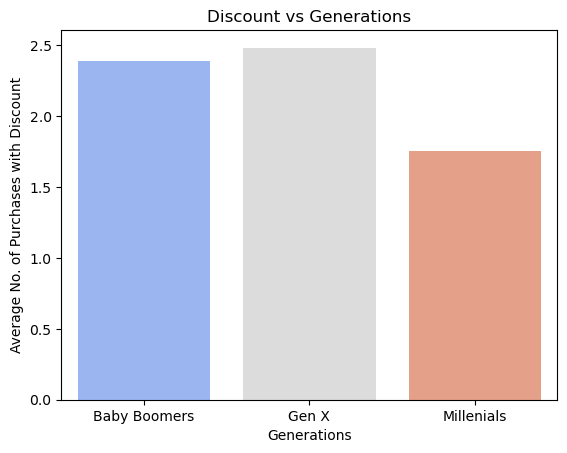

In [336]:
df_agg=df.groupby('Generations')['NumDealsPurchases'].mean().reset_index()
plt.title('Discount vs Generations')
sns.barplot(x='Generations',y='NumDealsPurchases', data=df_agg, palette = 'coolwarm')
plt.xlabel('Generations')
plt.ylabel('Average No. of Purchases with Discount')
plt.show()

Based on visualizations, millenials has lower number of purchases with discount. As mentioned before, millenials has lower frequency and monetary, hence, the discount did not work as inteded. Ideally, there should be promo/discounts that tailored into this generations. Looking at the correlation heat map earlier, there are negative correlation between web visits and `Count`. Using domain knowledge, younger generations should have higher tendency to visit our website. Based on the findings so far, the company needs to evaluate its approach to younger generations.

**RESPONSE VS PRODUCTS CATEGORY**

Analyze whether there are relation between campaigns responses to certain products category. First, create a new variable that shows whether the user had already buy meat, fish, and fruits products (perishable foods). The relation will be checked using simple table.

In [161]:
test = df.copy()
test['Meat'] = np.where(test['MntMeatProducts']>0, 1, 0)
test['Fish'] = np.where(test['MntFishProducts']>0, 1, 0)
test['Fruits'] = np.where(test['MntFruits']>0, 1, 0)
test[['Meat', 'Fish', 'Fruits']]
df_agg=test.groupby('Response')[['Meat', 'Fish', 'Fruits']].sum()
df_agg

# plt.title('Avg Frequency per Education')
# sns.barplot(x='Education',y='Count', data=df_agg)
# plt.xlabel('Education')
# plt.ylabel('Average Frequency')
# plt.show()

Meat  Fish  Fruits
Response                    
0         1901  1562    1542
1          334   290     295

In [162]:
df_agg=test.groupby('AcceptedCmp5')[['Meat', 'Fish', 'Fruits']].sum()
df_agg

Meat  Fish  Fruits
AcceptedCmp5                    
0             2073  1707    1686
1              162   145     151

In [163]:
df_agg=test.groupby('AcceptedCmp4')[['Meat', 'Fish', 'Fruits']].sum()
df_agg

Meat  Fish  Fruits
AcceptedCmp4                    
0             2068  1734    1710
1              167   118     127

In [164]:
df_agg=test.groupby('AcceptedCmp3')[['Meat', 'Fish', 'Fruits']].sum()
df_agg

Meat  Fish  Fruits
AcceptedCmp3                    
0             2072  1726    1704
1              163   126     133

In [165]:
df_agg=test.groupby('AcceptedCmp2')[['Meat', 'Fish', 'Fruits']].sum()
df_agg

Meat  Fish  Fruits
AcceptedCmp2                    
0             2205  1833    1816
1               30    19      21

In [166]:
df_agg=test.groupby('AcceptedCmp1')[['Meat', 'Fish', 'Fruits']].sum()
df_agg

Meat  Fish  Fruits
AcceptedCmp1                    
0             2091  1727    1712
1              144   125     125

There are no pattern found for products in every campaigns, for non-perishable goods,

In [168]:
df_agg=df.groupby('Response')[['MntWines', 'MntGoldProds']].mean()
df_agg

MntWines  MntGoldProds
Response                        
0           269.26         40.92
1           502.70         61.45

Next, check the monetary columns to campaigns,

In [170]:
df_agg=df.groupby('Response')[['MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'MntSweetProducts']].median()
df_agg

MntMeatProducts  MntFishProducts  MntFruits  MntWines  MntGoldProds  \
Response                                                                        
0                   56.00            11.00       7.00    152.50         21.00   
1                  174.50            25.00      21.00    448.00         39.50   

          MntSweetProducts  
Response                    
0                     7.00  
1                    20.00

In [171]:
df_agg=df.groupby('AcceptedCmp5')[['MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'MntSweetProducts']].median()
df_agg

MntMeatProducts  MntFishProducts  MntFruits  MntWines  \
AcceptedCmp5                                                          
0                       56.00            11.00       7.00    144.00   
1                      444.50            58.50      33.00    901.00   

              MntGoldProds  MntSweetProducts  
AcceptedCmp5                                  
0                    22.00              7.00  
1                    55.50             45.00

In [172]:
df_agg=df.groupby('AcceptedCmp4')[['MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'MntSweetProducts']].median()
df_agg

MntMeatProducts  MntFishProducts  MntFruits  MntWines  \
AcceptedCmp4                                                          
0                       61.00            12.00       8.00    151.00   
1                      137.00            16.00      16.00    760.00   

              MntGoldProds  MntSweetProducts  
AcceptedCmp4                                  
0                    24.00              8.00  
1                    34.00             12.00

In [173]:
df_agg=df.groupby('AcceptedCmp3')[['MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'MntSweetProducts']].median()
df_agg

MntMeatProducts  MntFishProducts  MntFruits  MntWines  \
AcceptedCmp3                                                          
0                       67.00            12.00       8.00    173.00   
1                       76.00             8.00       8.00    179.00   

              MntGoldProds  MntSweetProducts  
AcceptedCmp3                                  
0                    22.00              8.00  
1                    37.00              7.00

In [174]:
df_agg=df.groupby('AcceptedCmp2')[['MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'MntSweetProducts']].median()
df_agg

MntMeatProducts  MntFishProducts  MntFruits  MntWines  \
AcceptedCmp2                                                          
0                       66.00            12.00       8.00    172.00   
1                      136.50            27.50      15.00  1,044.50   

              MntGoldProds  MntSweetProducts  
AcceptedCmp2                                  
0                    24.00              8.00  
1                    46.00             15.50

In [175]:
df_agg=df.groupby('AcceptedCmp1')[['MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntGoldProds', 'MntSweetProducts']].median()
df_agg

MntMeatProducts  MntFishProducts  MntFruits  MntWines  \
AcceptedCmp1                                                          
0                       57.00            11.00       7.00    152.50   
1                      437.50            76.00      29.50    761.50   

              MntGoldProds  MntSweetProducts  
AcceptedCmp1                                  
0                    22.00              7.00  
1                    49.50             46.50

The pattern are random for the monetary value of the products. Next, analyze customer behaviour based on customer registration date,

In [193]:
df_date = df.copy()
# Define the reference date
reference_date = pd.Timestamp('2014-10-05')

# Calculate the difference in days
df_date['Days_Since_Reg'] = (reference_date - df_date['Dt_Customer']).dt.days

# Display the result
print(df_date[['Dt_Customer', 'Days_Since_Reg']].head())

  Dt_Customer  Days_Since_Reg
0  2012-09-04             761
1  2014-03-08             211
2  2013-08-21             410
3  2014-02-10             237
4  2014-01-19             259


<Axes: xlabel='Days_Since_Reg', ylabel='Count'>

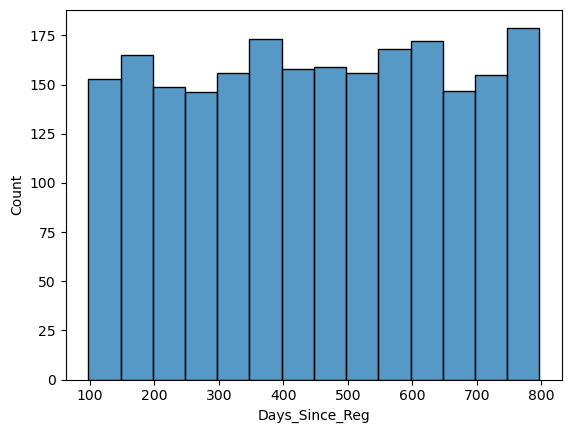

In [194]:
sns.histplot(data=df_date, x='Days_Since_Reg')

In [195]:
df_date[['Days_Since_Reg','Recency']].corr(method='spearman')

Days_Since_Reg  Recency
Days_Since_Reg            1.00     0.02
Recency                   0.02     1.00

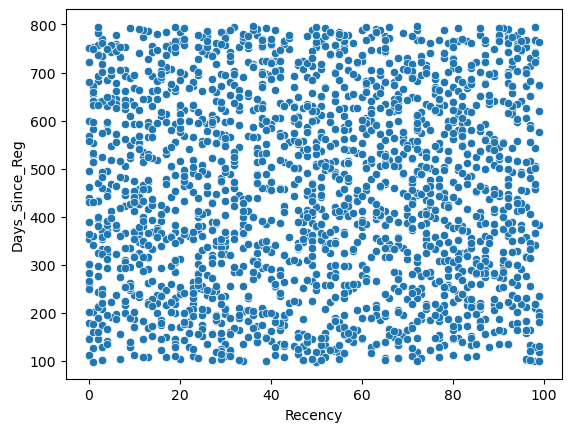

In [196]:
sns.scatterplot(data=df_date, x='Recency', y='Days_Since_Reg')
plt.show()

Interestingly, there are no correlation between days since registration to recency, which hard to evaluate. Next, check relation to response to latest campaign,

In [197]:
df_agg=df_date.groupby('Response')['Days_Since_Reg'].mean()
df_agg

Response
0   435.32
1   545.46
Name: Days_Since_Reg, dtype: float64

There are small difference between response vs days since registration.

**ANALYSIS SUMMARY (EDA)**

There are several key insights that i have found so far based on the analysis:
- Millenials has lower frequency and monetary than the other generations
- There are no significant difference between generations and number of purchases using discount (millenials are lower)
- Response rate of the latest campaign is higher for the millenials
- 4 out of 6 campaigns shows similar pattern, shows that the millenial's engagement did not convert well into purchases
- there are no pattern found on product vs generations


We can conclude that the main complication that we found so far is : "The millenial's customer engagement did not convert well into purchases". There is indication that the company's marketing campaign did not hit the right target. Based on this, the company must tailor their marketing campaign to non-millenials customer, or develop marketing strategies to millenials. To solve both of this issues, customer segmentation using RFM-method are needed.

# RFM SEGMENTATION

Combined with insights from earlier analysis, customer segmentation are necessary to make better recommendation for thematic campaign. Customer are segmented using RFM method. Recency are number of days since the customer made last purchases. Frequency are number of purchases of the customer. Monetary are total amount of purchase of the customer. Customer will be segmented based on these metrics.

In [211]:
# Reorder columns to have Recency in the correct place
rfm = df[['ID', 'Recency', 'Count', 'TotalMnt']]

rfm = rfm.rename(columns={
    'Count': 'Frequency',
    'TotalMnt': 'Monetary'
})

rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2236 non-null   object
 1   Recency    2236 non-null   int64 
 2   Frequency  2236 non-null   int64 
 3   Monetary   2236 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 87.3+ KB


Check the R, F, and M distribution to decide which binning method to use for the RFM scoring,

       Recency  Frequency  Monetary
count 2,236.00   2,236.00  2,236.00
mean     49.12      12.55    605.99
std      28.96       7.21    601.87
min       0.00       0.00      5.00
25%      24.00       6.00     69.00
50%      49.00      12.00    396.50
75%      74.00      18.00  1,045.50
max      99.00      32.00  2,525.00


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

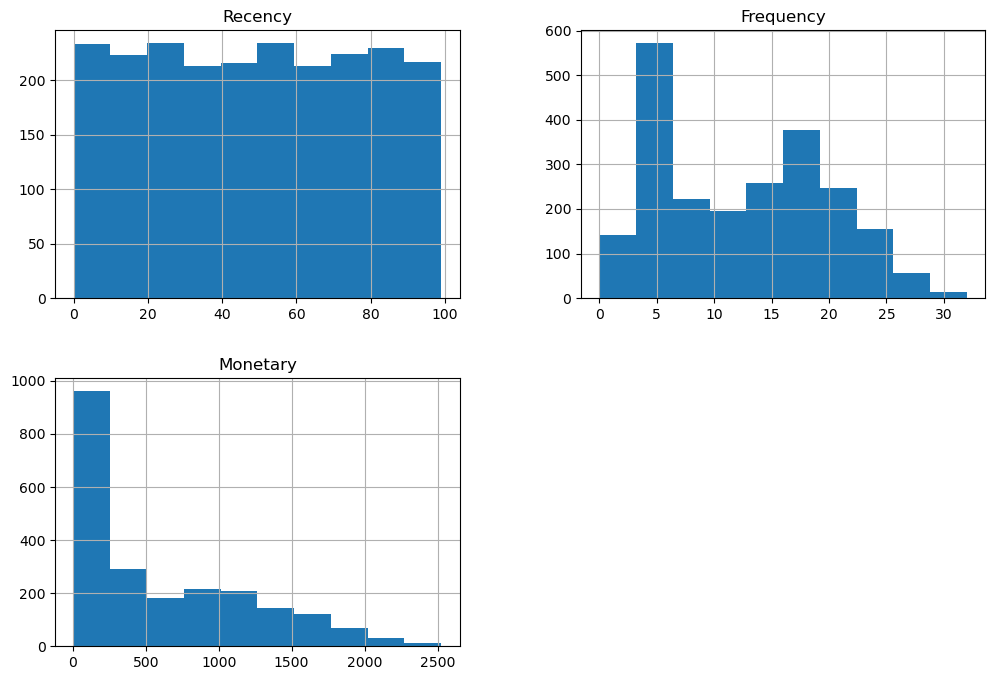

In [215]:
# Check the distribution of RFM values
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())

# Visualize the distribution
rfm[['Recency', 'Frequency', 'Monetary']].hist(figsize=(12, 8))

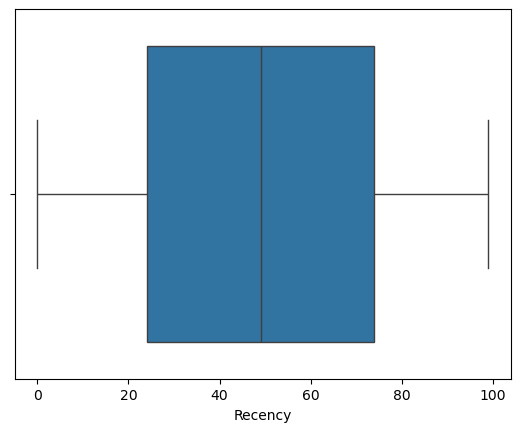

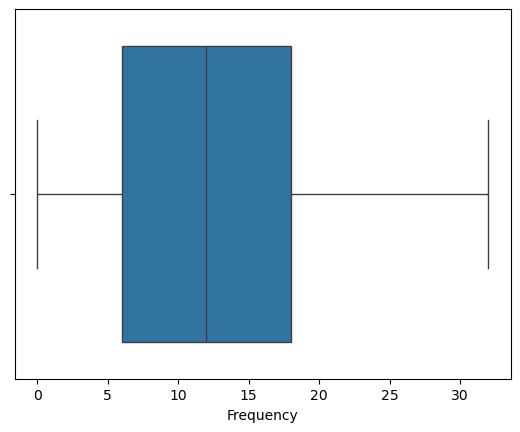

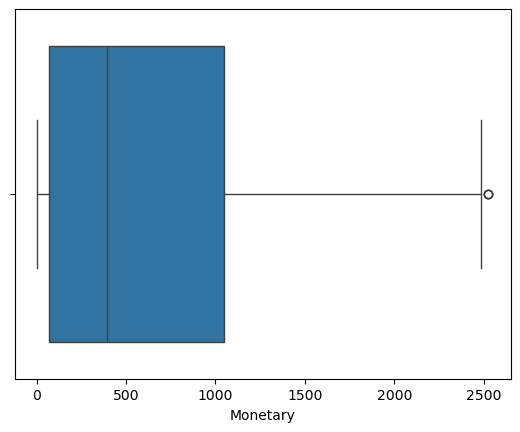

In [217]:
sns.boxplot(data=rfm, x='Recency')
plt.show()
sns.boxplot(data=rfm, x='Frequency')
plt.show()
sns.boxplot(data=rfm, x='Monetary')
plt.show()

Based on the histogram and box-plot visualizations, monetary and frequency data are skewed, while recency are more normally distributed than the other 2. I use quantile method (.qcut)  for frequency and monetary scoring. For the recency scoring, i use rule-based method using .cut based on business understanding,
- Customer last purchases in less than a week (<7 days) get 5.
- Customer last purchases between 7 days and a month get 4.
- Customer last purchases between 1 month and 2 month get 3.
- Customer last purchases between 2 months and 3 month get 2.
- Customer last purchases in more than 3 month get 1.

In [272]:
# Scale RFM values to scores between 1 and 5
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=[0, 7, 30, 60, 90, float('inf')], labels=[5, 4, 3, 2, 1], include_lowest=True)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

In [274]:
rfm['R_Score'].value_counts()

R_Score
2    664
3    653
4    538
1    197
5    184
Name: count, dtype: int64

In [275]:
rfm['F_Score'].value_counts()

F_Score
1    522
4    461
3    453
2    414
5    386
Name: count, dtype: int64

In [278]:
rfm['M_Score'].value_counts()

M_Score
1    451
3    448
4    448
5    445
2    444
Name: count, dtype: int64

For the segmentation, i use weighted scoring to adjust with business and analysis need. Perishable foods will have high score of recency and frequency, while non-perishable goods will have high monetary score. Since the analysis are focused on recency and frequency, R and F score will have higher weighted score than M score. Hence the weighted score,
- Recency : 0,4
- Frequency : 0,4
- Monetary : 0,2


For the segment, the customer will be divided into 6 segments based on the result of the weighted scoring,
- Champions, score >= 4
- Loyal Customers, score 3,5 - 4
- Potential Loyalists, score 3 - 3,5
- At risk, score 2,5 - 3
- Hibernating, score 2 - 2,5
- Lost Customers, score < 2

In [239]:
# Calculate the weighted RFM score
rfm['Weighted_Score'] = (
    rfm['R_Score'].astype(int) * 0.4 +
    rfm['F_Score'].astype(int) * 0.4 +
    rfm['M_Score'].astype(int) * 0.2
)

# Segment customers based on Weighted Score
def segment_customer(score):
    if score >= 4.0:
        return 'Champions'
    elif score >= 3.5:
        return 'Loyal Customers'
    elif score >= 3.0:
        return 'Potential Loyalists'
    elif score >= 2.5:
        return 'At Risk'
    elif score >= 2.0:
        return 'Hibernating'
    else:
        return 'Lost Customers'

# Apply segmentation
rfm['Segment'] = rfm['Weighted_Score'].apply(segment_customer)

# Output the final RFM table
display(rfm[['ID', 'Weighted_Score', 'Segment']])

ID  Weighted_Score              Segment
0      5524            4.20            Champions
1      2174            1.80       Lost Customers
2      4141            4.00            Champions
3      6182            2.60              At Risk
4      5324            2.20          Hibernating
...     ...             ...                  ...
2235  10870            3.80      Loyal Customers
2236   4001            3.00  Potential Loyalists
2237   7270            3.00  Potential Loyalists
2238   8235            4.40            Champions
2239   9405            2.40          Hibernating

[2236 rows x 3 columns]

In [282]:
rfm['Segment'].value_counts()

Segment
Potential Loyalists    477
Hibernating            413
Champions              389
Lost Customers         376
At Risk                296
Loyal Customers        285
Name: count, dtype: int64

We identified 6 segments based on RFM method. The proportions of the segments are shown with pie chart.

In [313]:
# Merge the original table 'df' with the segmentation table 'rfm_df'
df_segment = df.merge(rfm[['ID', 'Segment']], on='ID', how='left')

In [315]:
df_agg3=df_segment['Segment'].value_counts(normalize=1).reset_index()
df_agg3['percentage']=100*df_agg3['proportion']
df_agg3

Segment  proportion  percentage
0  Potential Loyalists        0.21       21.33
1          Hibernating        0.18       18.47
2            Champions        0.17       17.40
3       Lost Customers        0.17       16.82
4              At Risk        0.13       13.24
5      Loyal Customers        0.13       12.75

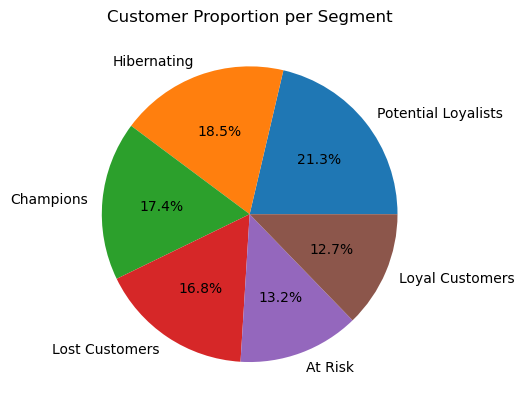

In [304]:
plt.pie(data=df_agg3,x='percentage',labels='Segment', autopct='%1.1f%%')
plt.title('Customer Proportion per Segment')
plt.show()

We have 16,8% lost customers and 18,5% hibernating customers that needs treatment, especially the hibernating segments. This shows the importance of better marketing campaign to improve these segments retention andd frequency. The relation betweens segment and campaign will be analyzed

**SEGMENT VS RESPONSE**

Check the proportions of customer that responded to campaign(s) for each segment,

In [321]:
segment_cat = ['Champions', 'Lost Customers', 'At Risk', 'Hibernating', 
               'Potential Loyalists', 'Loyal Customers']

for i in segment_cat:
    print(f"Segment: {i}")
    
    # Count responses for each segment
    df_agg = df_segment[df_segment['Segment'] == i].groupby('Response')['ID'].count()
    
    # Calculate proportions
    df_proportion = df_agg / df_agg.sum() * 100
    
    # Display counts and proportions
    print("Counts:")
    print(df_agg)
    print("Proportions (%):")
    print(df_proportion)
    print("\n")

Segment: Champions
Counts:
Response
0    272
1    117
Name: ID, dtype: int64
Proportions (%):
Response
0   69.92
1   30.08
Name: ID, dtype: float64


Segment: Lost Customers
Counts:
Response
0    367
1      9
Name: ID, dtype: int64
Proportions (%):
Response
0   97.61
1    2.39
Name: ID, dtype: float64


Segment: At Risk
Counts:
Response
0    257
1     39
Name: ID, dtype: int64
Proportions (%):
Response
0   86.82
1   13.18
Name: ID, dtype: float64


Segment: Hibernating
Counts:
Response
0    376
1     37
Name: ID, dtype: int64
Proportions (%):
Response
0   91.04
1    8.96
Name: ID, dtype: float64


Segment: Potential Loyalists
Counts:
Response
0    401
1     76
Name: ID, dtype: int64
Proportions (%):
Response
0   84.07
1   15.93
Name: ID, dtype: float64


Segment: Loyal Customers
Counts:
Response
0    229
1     56
Name: ID, dtype: int64
Proportions (%):
Response
0   80.35
1   19.65
Name: ID, dtype: float64




The proportions increase from lost to champion segments. In terms of segmentation, this is expected, as the bottom-tier segment should have worse number than the top-tier segment (We did the segmentation after the campaign. Hence, if the opposite case happened, then the campaign clearly did not improve customer purchase behaviour). But, the number shows the need of improvement in company's marketing strategy. Next, check campaigns trend from each segments,

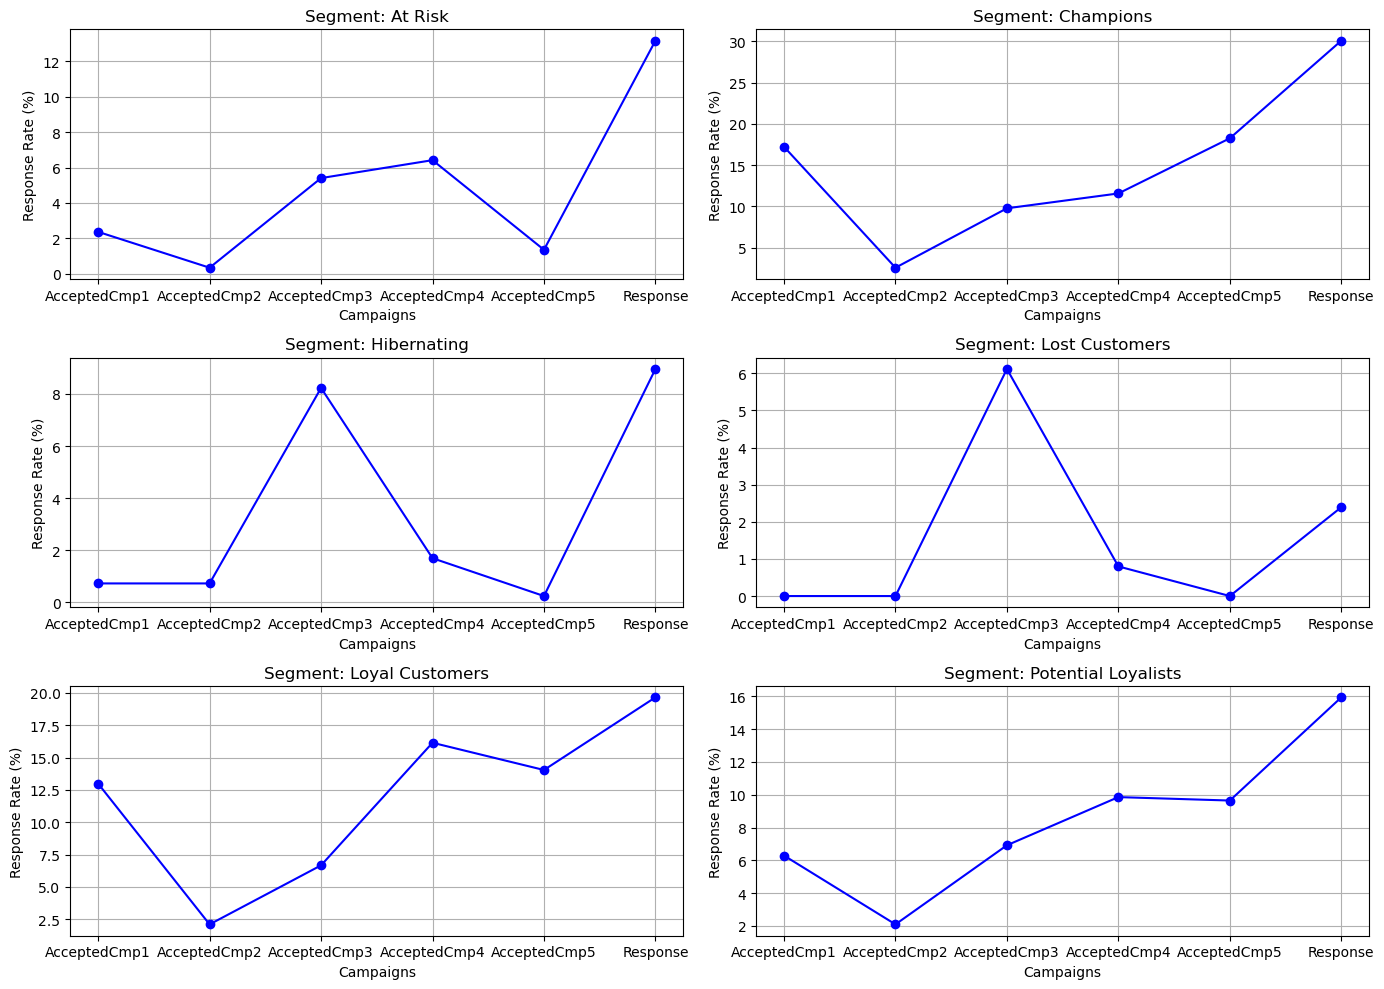

In [263]:
# 1. Calculate Campaign Response Rates by RFM Segment
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
response_rates = df_segment.groupby('Segment')[campaign_columns].mean() * 100  # Convert to percentage

# 2. Set up subplot structure (2 columns)
num_segments = len(response_rates.index)
fig, axes = plt.subplots(nrows=(num_segments // 2) + (num_segments % 2), ncols=2, figsize=(14, 10))

# 3. Flatten axes array and iterate through each segment
axes = axes.flatten()
for idx, segment in enumerate(response_rates.index):
    axes[idx].plot(campaign_columns, response_rates.loc[segment], marker='o', color='b')
    axes[idx].set_title(f'Segment: {segment}')
    axes[idx].set_xlabel('Campaigns')
    axes[idx].set_ylabel('Response Rate (%)')
    axes[idx].grid(True)

# 4. Remove empty subplots if any
for ax in axes[num_segments:]:
    fig.delaxes(ax)

# 5. Adjust layout and show plot
plt.tight_layout()
plt.show()

Based on the trend, latest campaigns did improve customer response rate across all segment (except lost customers). Other variables need to be analyzed, especially the number of purchases using discount.

In [251]:
df_agg=df_segment.groupby('Segment')[['Age', 'Income','NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ,'NumWebPurchases', 'NumWebVisitsMonth']].mean()
df_agg

Age    Income  NumDealsPurchases  NumCatalogPurchases  \
Segment                                                                       
At Risk             44.09 45,517.52               2.58                 1.59   
Champions           46.38 71,332.98               2.31                 5.60   
Hibernating         43.68 36,714.09               2.20                 0.67   
Lost Customers      41.85 32,410.01               1.62                 0.24   
Loyal Customers     47.51 67,865.99               2.37                 4.87   
Potential Loyalists 47.04 59,284.05               2.83                 3.24   

                     NumStorePurchases  NumWebPurchases  NumWebVisitsMonth  
Segment                                                                     
At Risk                           4.66             3.53               5.80  
Champions                         9.21             6.43               4.01  
Hibernating                       3.33             2.35               6.33  
Lost Customers                    2.75             1.37               6.55  
Loyal Customers                   8.46             5.90               4.19  
Potential Loyalists               6.67             5.09               4.92

The table imply that the discount did not have significant impact across the segment. Based on the earlier analysis, we could conclude that the discount did not achieve its intended purposes, which is to drive customer purchases in bottom-tier segment.

In [253]:
df_agg=df_segment.groupby('Segment')[['MntWines', 'MntGoldProds', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].mean()
df_agg

MntWines  MntGoldProds  MntFruits  MntMeatProducts  \
Segment                                                                   
At Risk                178.60         39.52      15.84            92.95   
Champions              615.93         74.19      54.76           353.75   
Hibernating             54.36         17.91       5.51            30.08   
Lost Customers          17.06          8.54       3.11            11.73   
Loyal Customers        595.69         72.89      48.13           298.87   
Potential Loyalists    396.08         55.36      32.70           222.72   

                     MntFishProducts  MntSweetProducts  
Segment                                                 
At Risk                        25.05             15.45  
Champions                      77.23             56.87  
Hibernating                     7.44              6.87  
Lost Customers                  4.29              2.95  
Loyal Customers                67.92             48.01  
Potential Loyalists            47.03             34.02

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   object        
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   float64       
 5   Dt_Customer          2236 non-null   datetime64[ns]
 6   Recency              2236 non-null   int64         
 7   MntWines             2236 non-null   int64         
 8   MntFruits            2236 non-null   int64         
 9   MntMeatProducts      2236 non-null   int64         
 10  MntFishProducts      2236 non-null   int64         
 11  MntSweetProducts     2236 non-null   int64         
 12  MntGoldProds         2236 non-null   int64         
 13  NumDealsPurchases    2236 non-null   i

In [257]:
df_pivot=df_segment[['Education', 'Segment', 'ID']].pivot_table(index='Education',columns='Segment',aggfunc='count')
df_pivot

ID                                                       \
Segment       At Risk Champions Hibernating Lost Customers Loyal Customers   
Education                                                                    
Graduate       184.00    232.00      228.00         240.00          163.00   
Postgraduate   107.00    157.00      161.00         115.00          122.00   
Undergraduate    5.00       NaN       24.00          21.00             NaN   

                                   
Segment       Potential Loyalists  
Education                          
Graduate                   280.00  
Postgraduate               193.00  
Undergraduate                4.00

In [261]:
df_pivot=df_segment[['Marital_Status', 'Segment', 'ID']].pivot_table(index='Marital_Status',columns='Segment',aggfunc='count')
df_pivot

ID                                                       \
Segment        At Risk Champions Hibernating Lost Customers Loyal Customers   
Marital_Status                                                                
Alone              108       137         135            138             104   
Partner            188       252         278            238             181   

                                    
Segment        Potential Loyalists  
Marital_Status                      
Alone                          172  
Partner                        305

In [340]:
df_segment.to_csv('caps2.csv')

**SEGMENT RECOMMENDATION**

| **Segment**         | **Theme**                           | **Product Focus**            | **Message**                                | **Channel**                      |
|---------------------|-------------------------------------|-----------------------------|------------------------------------------|----------------------------------|
| Champions           | Exclusive Loyalty Rewards           | Wines, meat products        | "Exclusive tasting event just for you!"  | Email, SMS                       |
| Loyal Customers      | Thank You – Special Bundle Offers   | Wines, sweet products       | "Exclusive bundles for our loyal customers!" | Email, website pop-up            |
| Potential Loyalists  | Welcome Back! Let’s Make It Special | Wines, sweet products       | "Personalized discounts on your favorite items!" | Email, app notifications         |
| At Risk             | We Miss You!                        | Sweet products, fruit       | "Come back and enjoy 20% off!"           | Email, SMS, ads                  |
| Hibernating         | Discover What’s New!                | Meat products, fruit        | "Check out our new arrivals!"            | Social media, email              |
| Lost Customers      | Win Back with a Special Offer       | Sweet products, wine        | "We’d love to see you again — 30% off your next!" | Email, SMS, social ads           |

Based on the findings that we found in the analysis, here is my proposed thematic campaigns for the company. Higher-tier segment are already loyal and has decent monetary value, offering them exclusive access to our premium/expensive products to enhance the monetary and frequency of these segments. For lower-tier segments, the goals is to make them comeback to buy our products. Seasonal offering and new products promotions might draw their interests.

With RFM segmentation, we can make better campaign by using different promotions to each segments based on their purchasing behaviour instead of using same campaign to all customer.

Different generations might benefit from specific campaigns. The company facing problems on converting millenial's engagement, since their response rate are higher than the other generations, but has lower frequency and monetary value. On top of that, there are no significant difference between each generations in terms of number of purchases using discount, despite having higher number of web visits per month (discount correlates with web visits). Based on the findings, there are 2 options,
- Switch our focus to customer non-millenials, as millenials has lower value,
- Make better product(promo) for millenials that drive conversion rate, as they already had better response rate compared to other generations

Focusing on older generations seems lucrative idea for short-term revenue growth and higher engagement. However, do not completely neglect millenials, to build future customer base through digital channels. If the company decides to focus or at least make campaign for millenials, here is my proposed campaigns for millenials, based on findings in this analysis,
- Create a digital-first campaign that resonates with millennials.
- Promote products through Instagram stories, TikTok, and influencer marketing.
- Offer a referral program to encourage millennials to bring friends.

# CONCLUSION & RECOMMENDATION

**CONCLUSION**
- Recency affected by latest promotional campaigns, while frequency mostly affected by customer generations.
- There are 6 customer segments based on their purchasing behaviour (Recency, Frequency, and Monetary)
- Company can either improve their campaigns to millenials using digital channels, or/and focus on older generations using better segments based on their recency, frequency, and monetary purchasing behaviour.

**RECOMMENDATION**
- Analyze the customer frequency behaviour using product category frequency of purchases, if the data could support it.
- Analyze purchasing channel to develop more sophisticated marketing strategy.
- Market a new product that suits younger generations.